In [18]:
import gymnasium as gym
import gym_examples
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.colors import Normalize

In [19]:
env = gym.make("gym_examples/GridWorld-v0", render_mode="rgb_array")
observation, info = env.reset()

# QTable : contains the Q-Values for every (state,action) pair
numstates = (env.observation_space["agent"].high[0] + 1) * (
    env.observation_space["agent"].high[1] + 1
)
numactions = env.action_space.n
qtable = np.random.rand(numstates, numactions).tolist()

# hyperparameters
episodes = 70
gamma = 0.8
epsilon = 0.1
decay = 0.01

episodes # 1 / 70
Done in 2225 steps



/var/folders/9f/n__6xm3123587g3b26ppz2nr0000gn/T/ipykernel_12638/2890229028.py:73: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


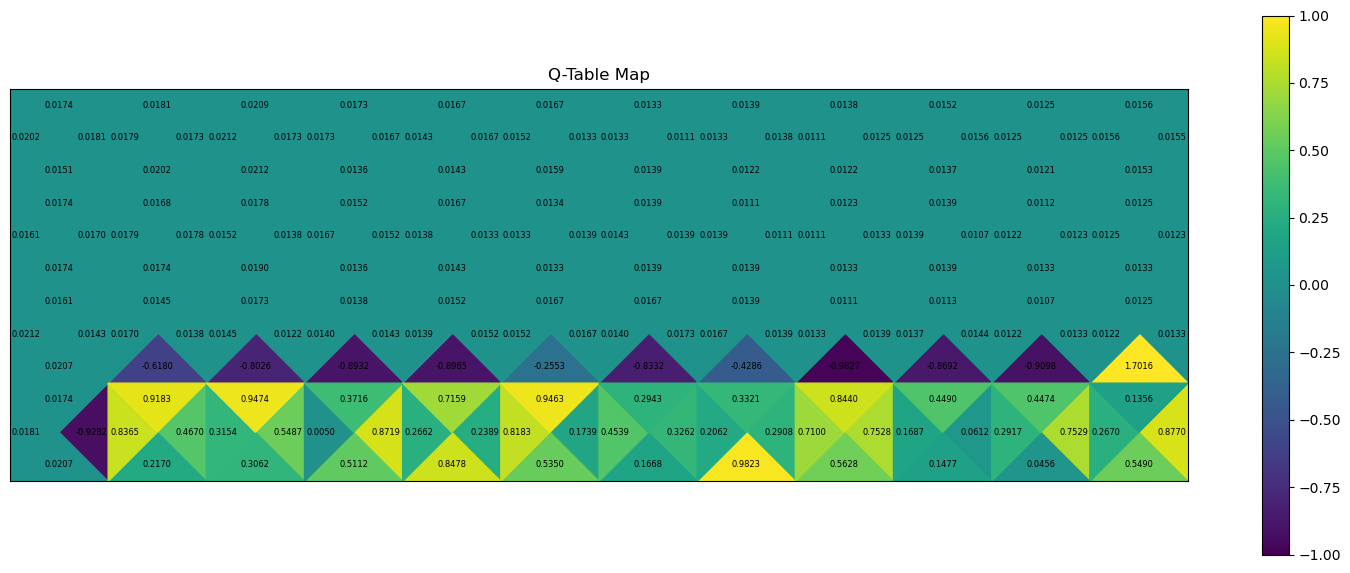

episodes # 2 / 70
Done in 134 steps



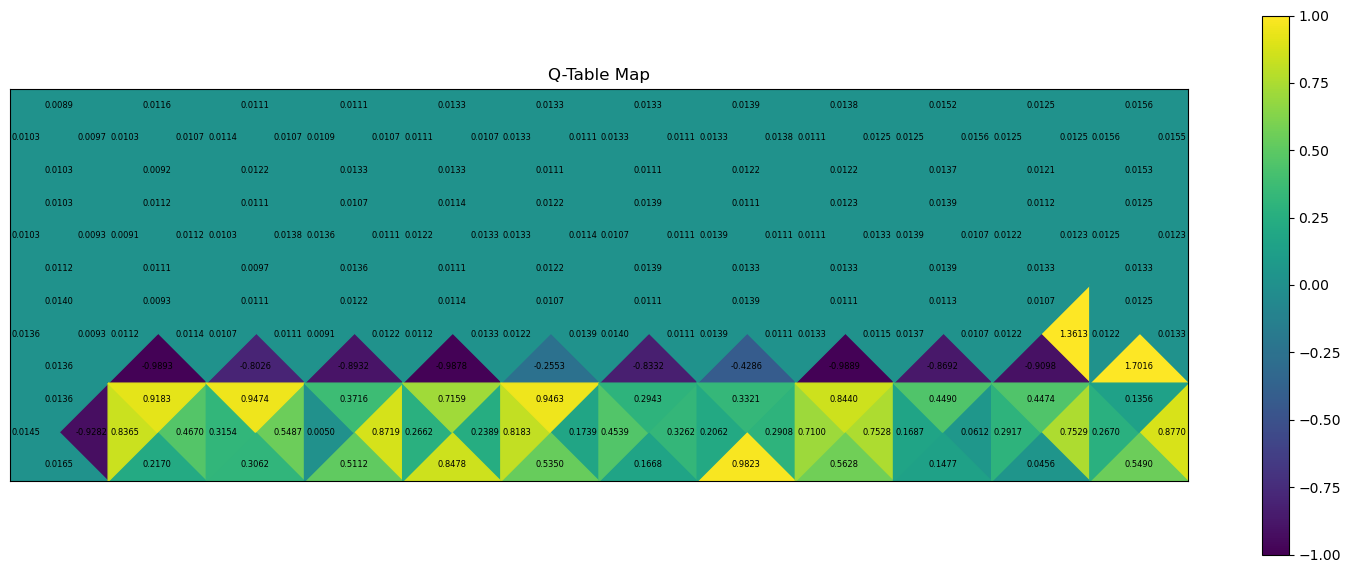

episodes # 3 / 70
Done in 76 steps



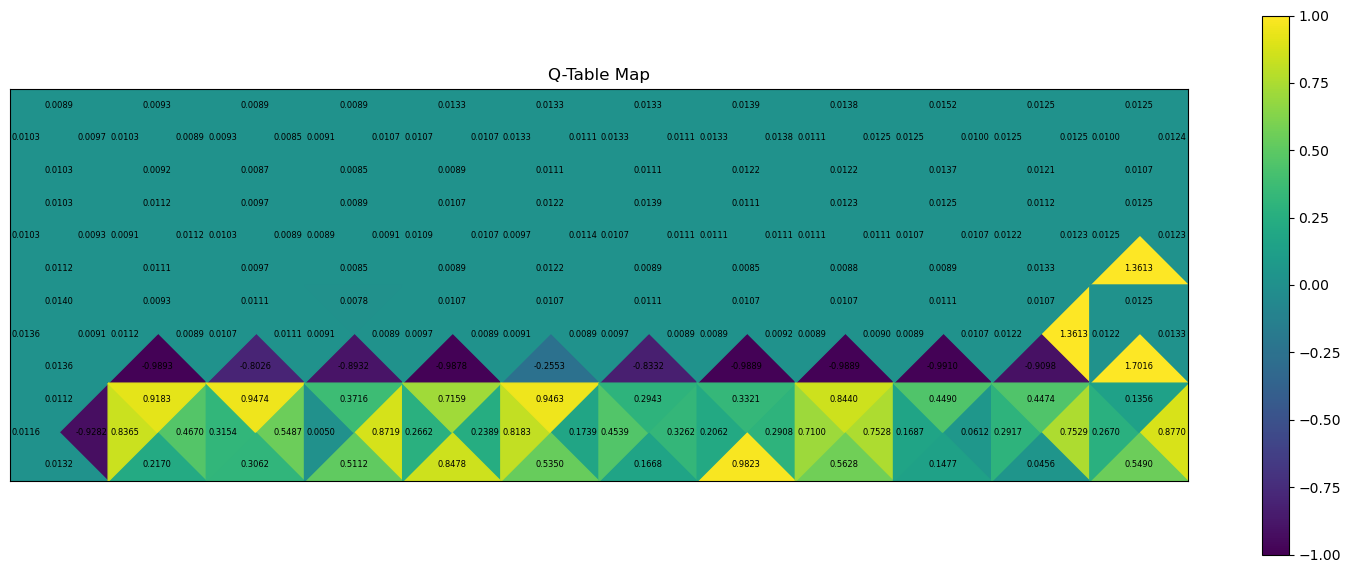

episodes # 4 / 70
Done in 94 steps



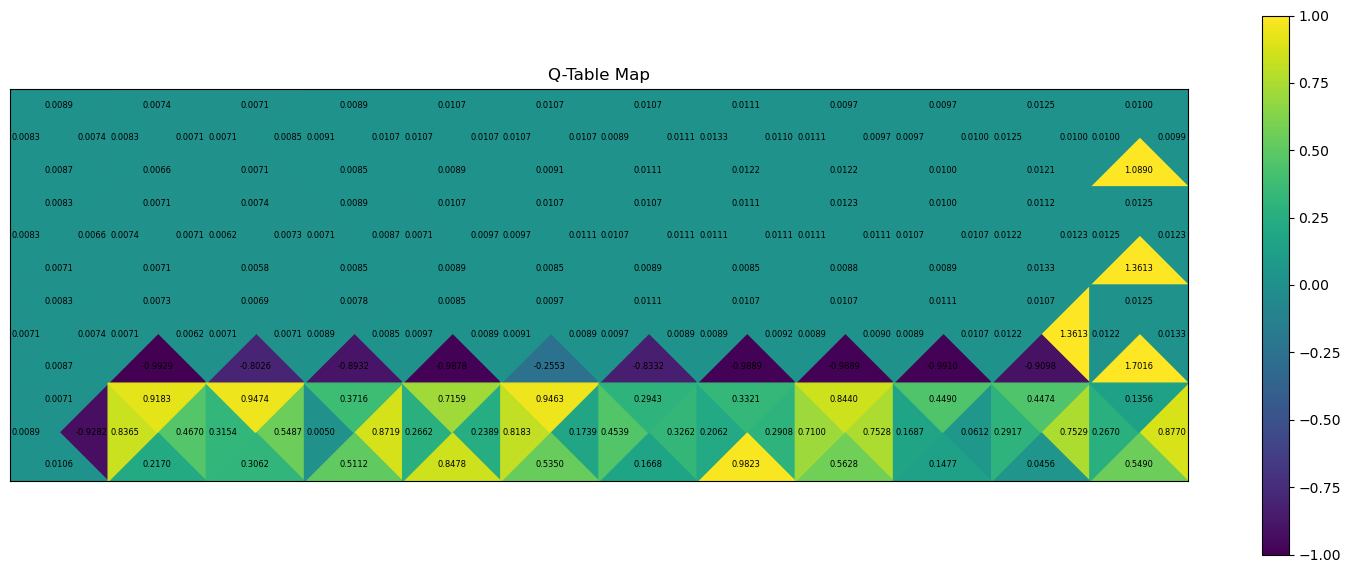

episodes # 5 / 70
Done in 47 steps



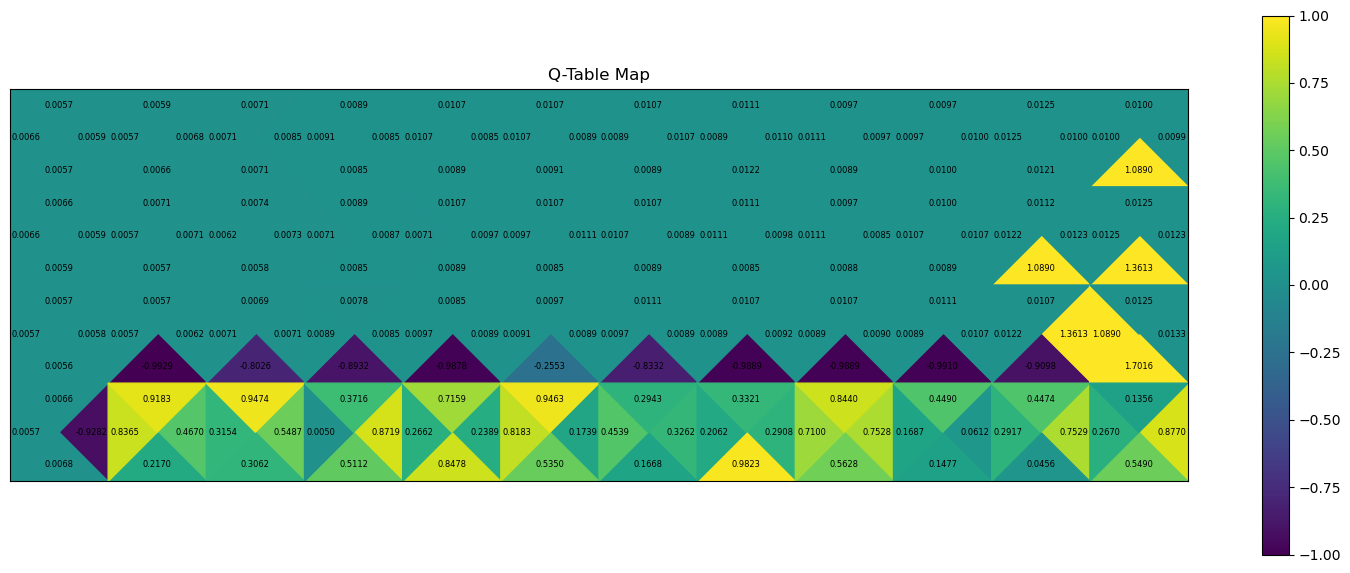

episodes # 6 / 70
Done in 74 steps



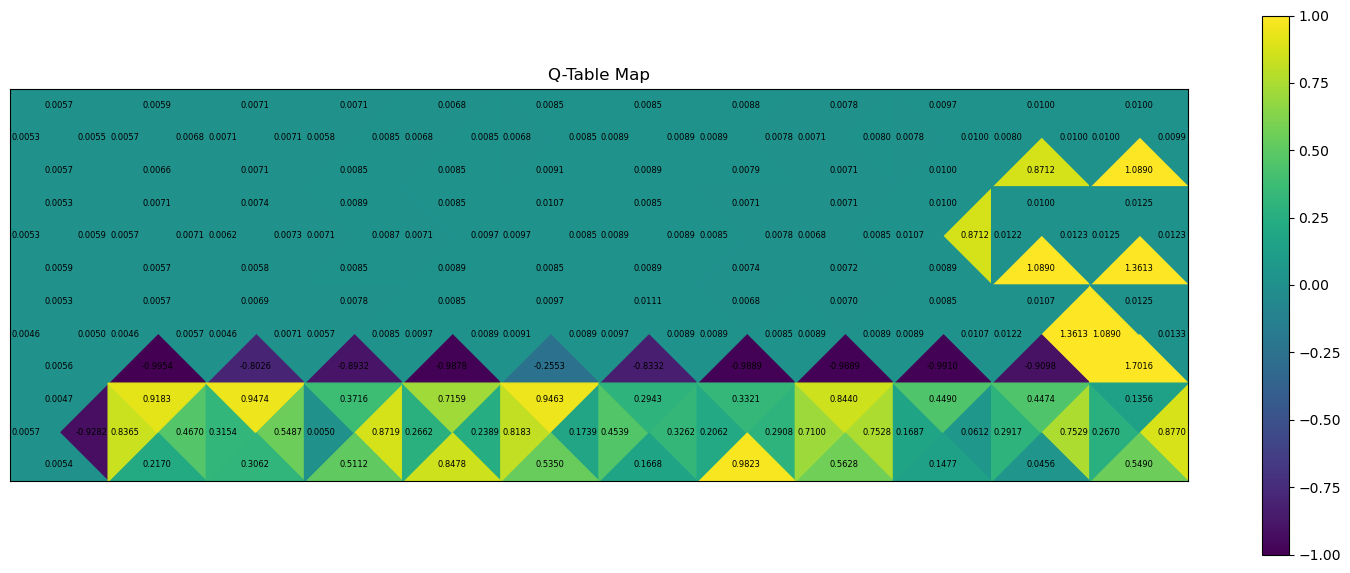

episodes # 7 / 70
Done in 110 steps



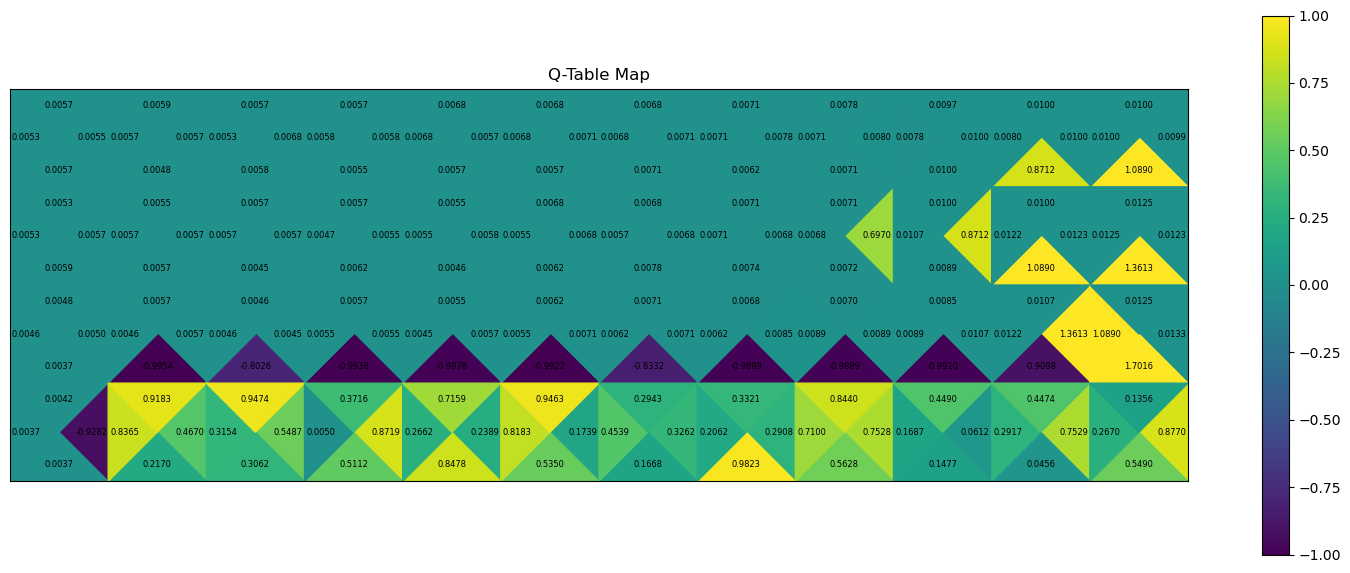

episodes # 8 / 70
Done in 40 steps



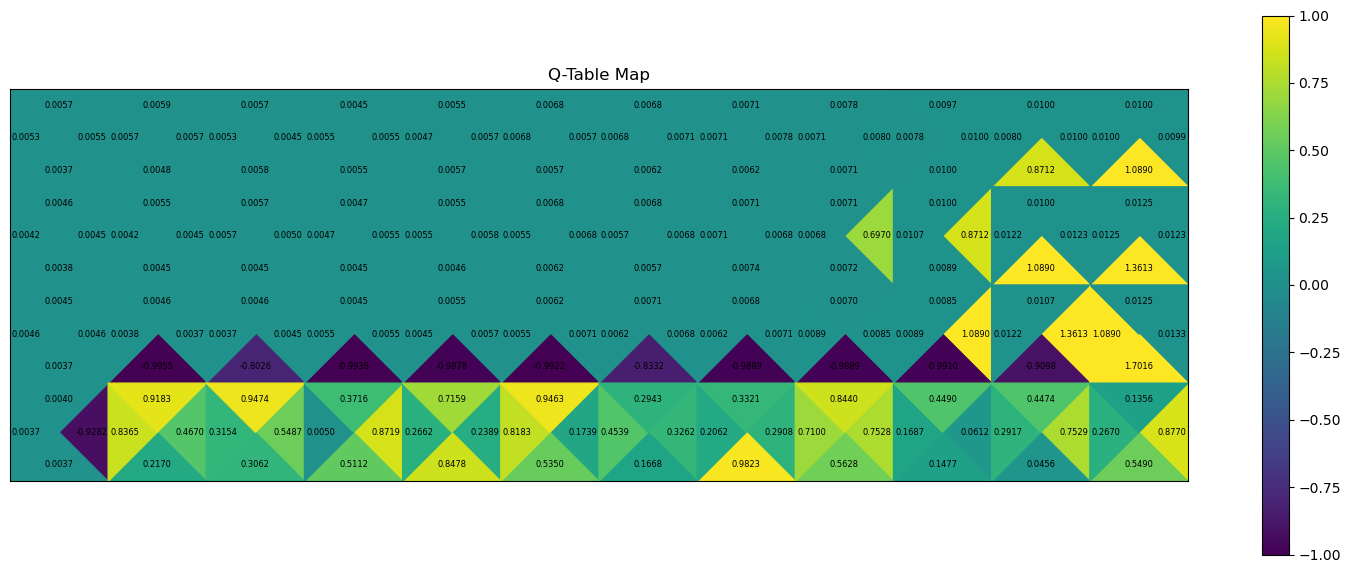

episodes # 9 / 70
Done in 40 steps



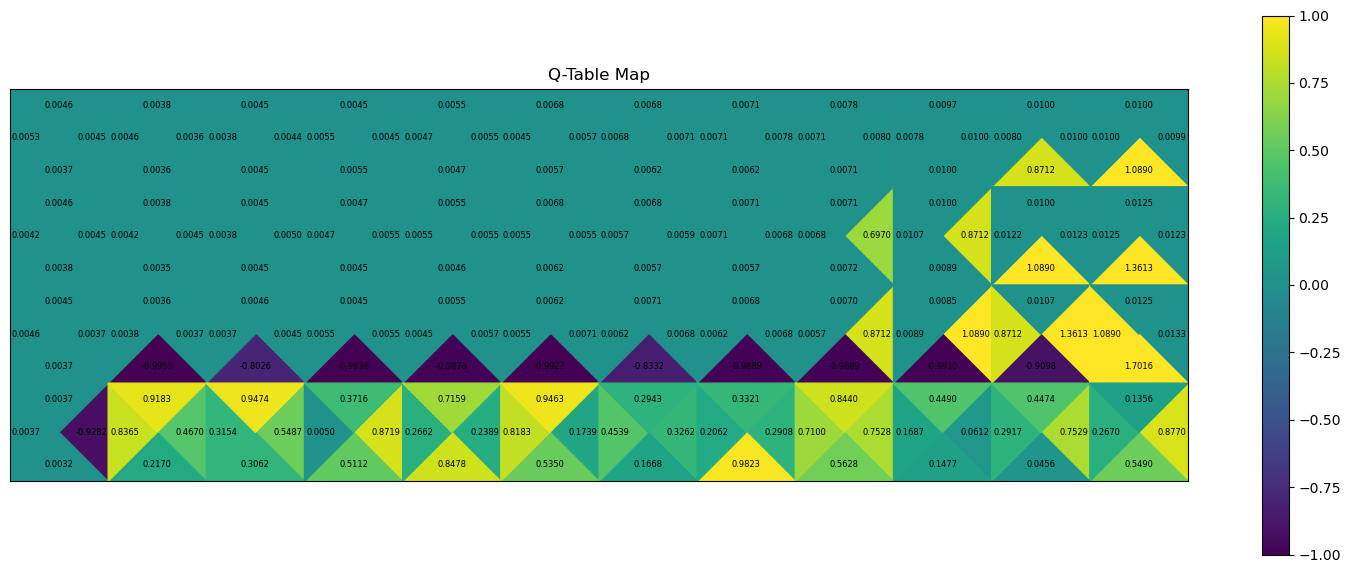

episodes # 10 / 70
Done in 44 steps



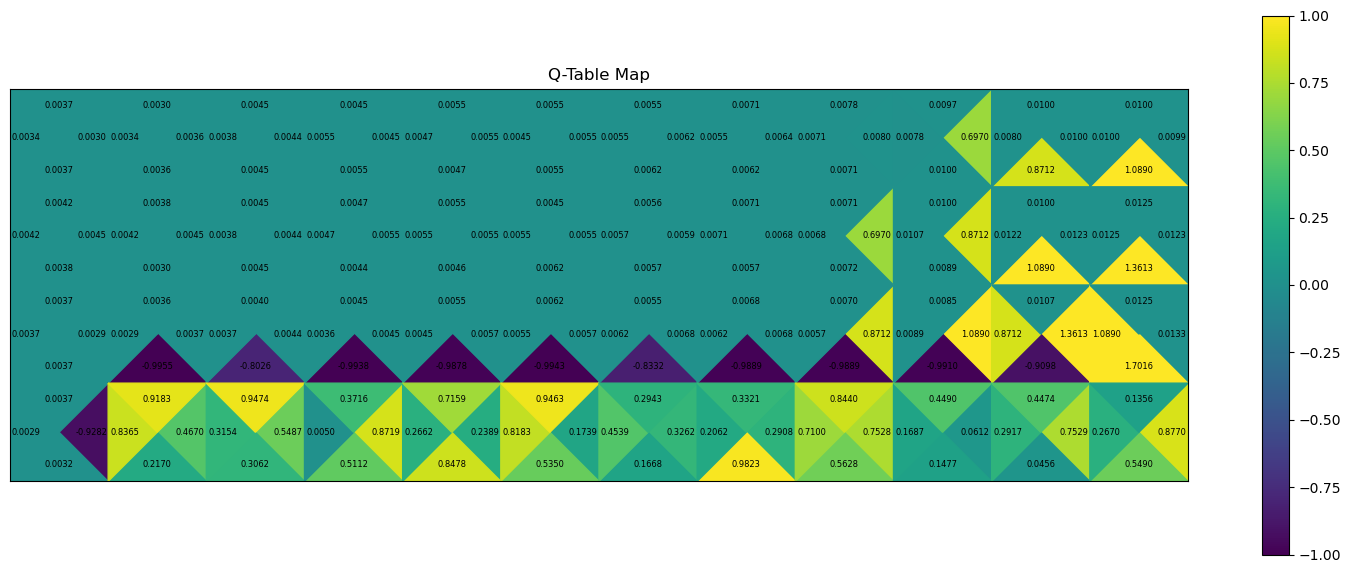

episodes # 11 / 70
Done in 19 steps



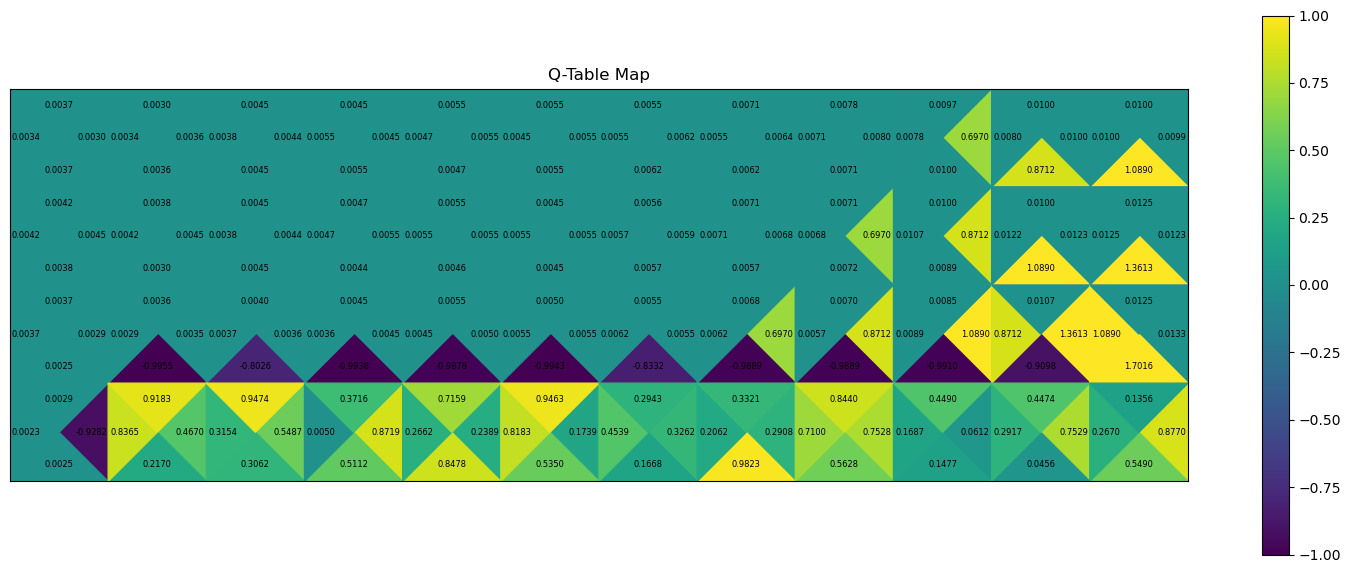

episodes # 12 / 70
Done in 27 steps



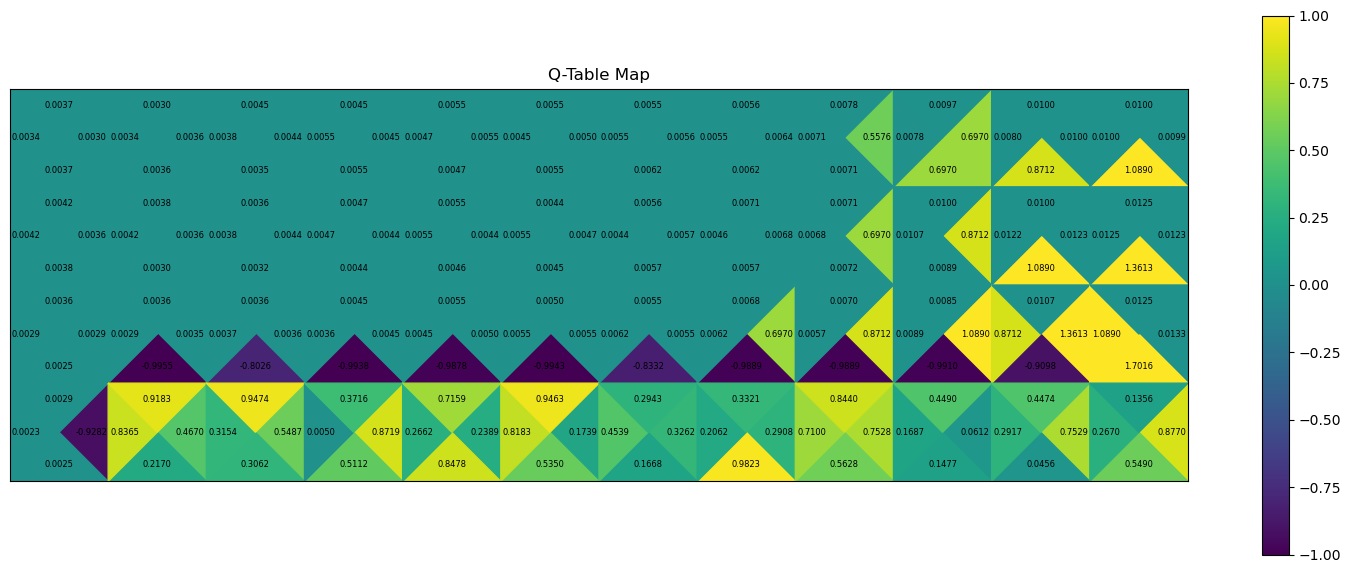

episodes # 13 / 70
Done in 50 steps



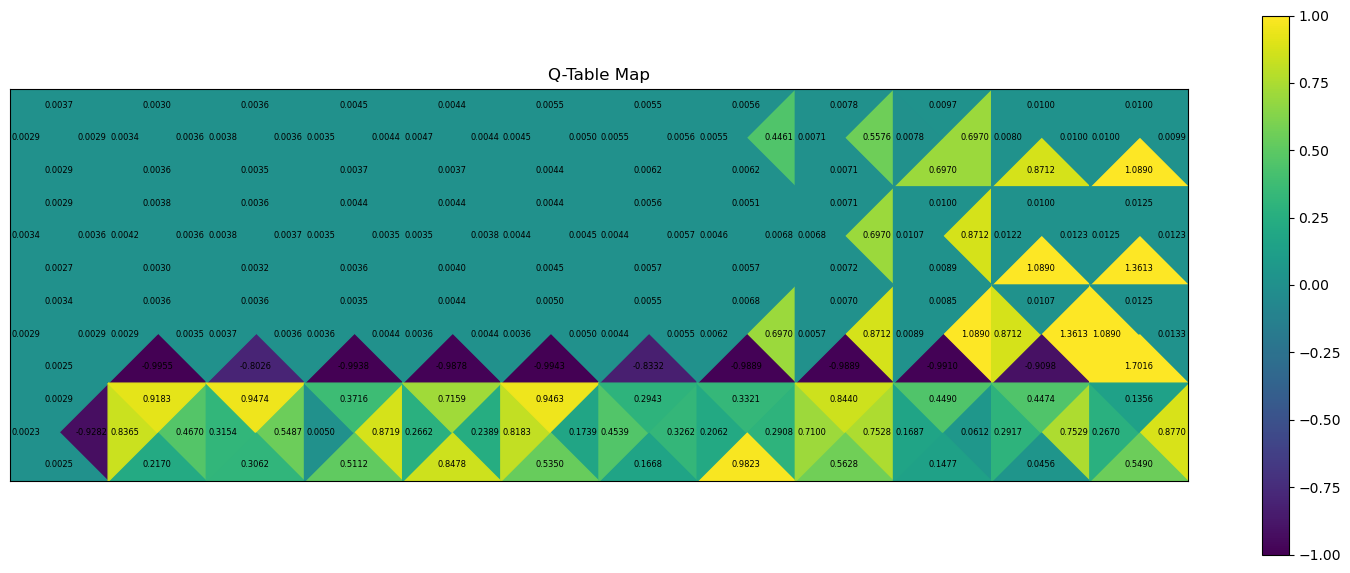

episodes # 14 / 70
Done in 32 steps



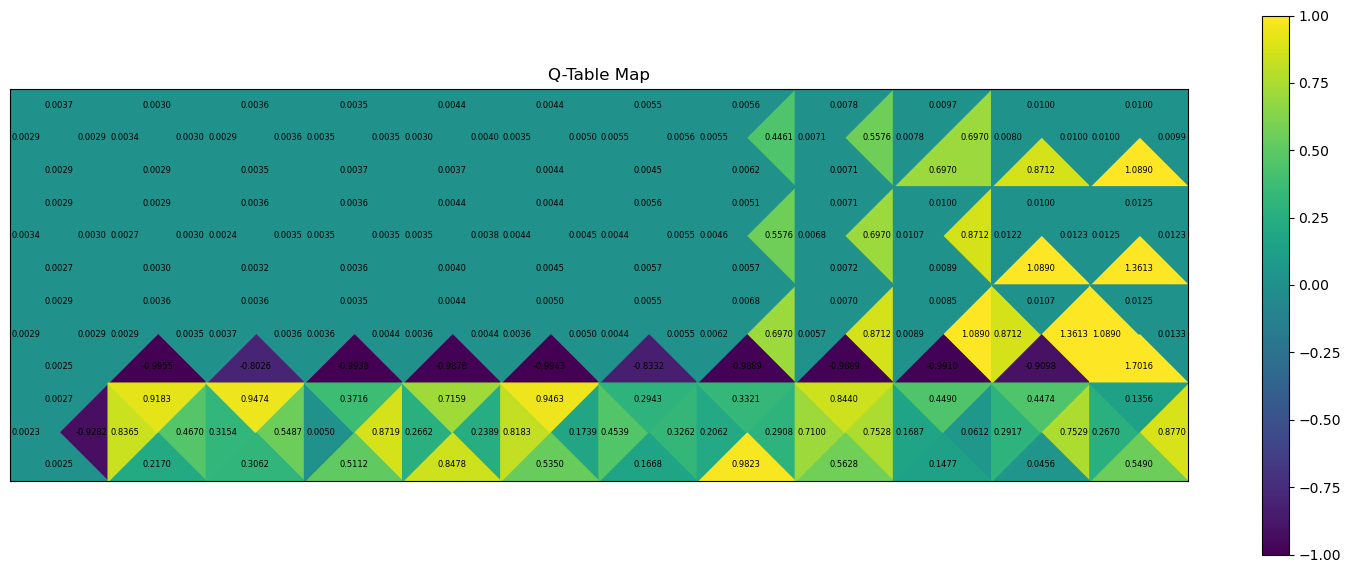

episodes # 15 / 70
Done in 17 steps



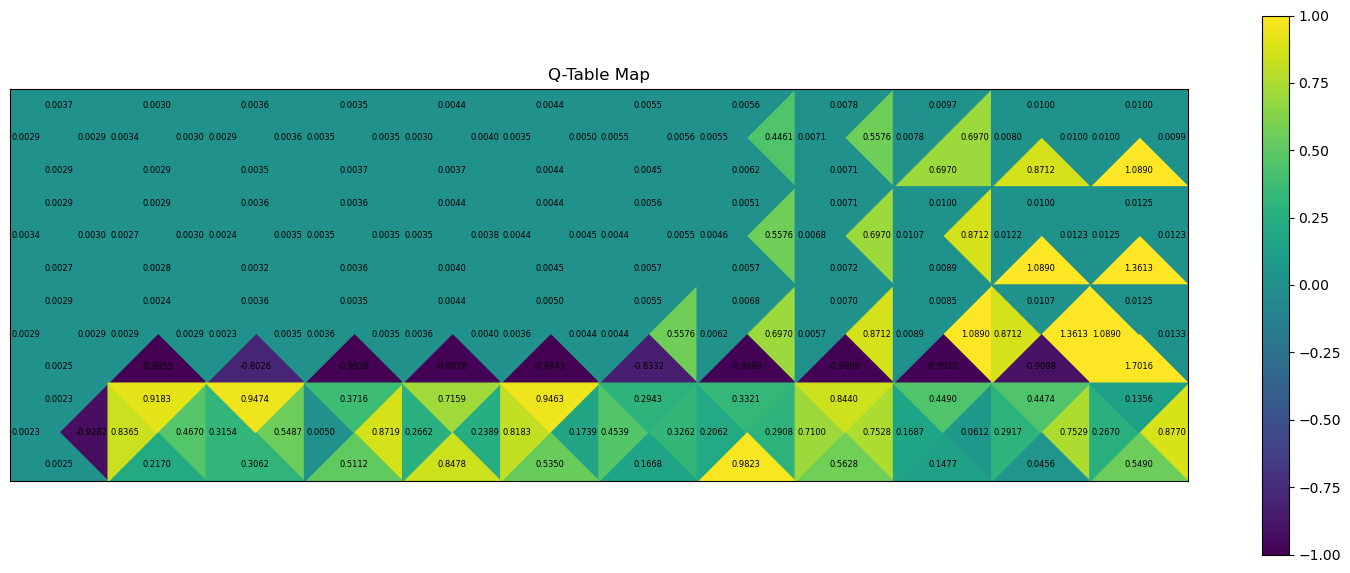

episodes # 16 / 70
Done in 30 steps



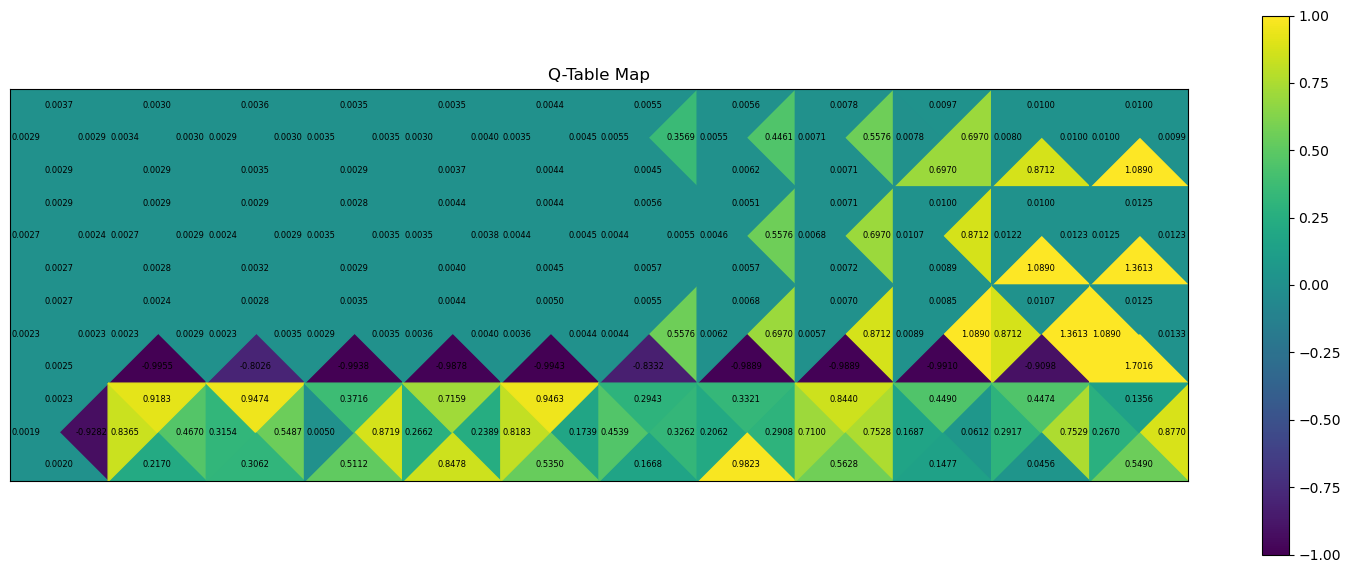

episodes # 17 / 70
Done in 31 steps



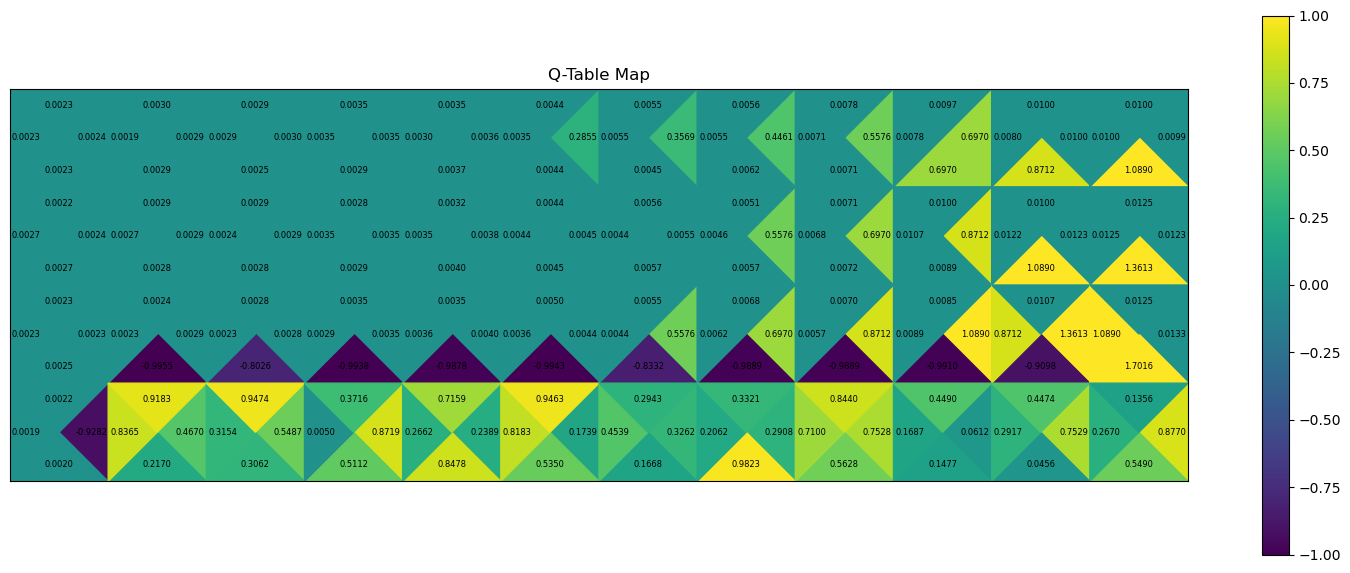

episodes # 18 / 70
Done in 18 steps



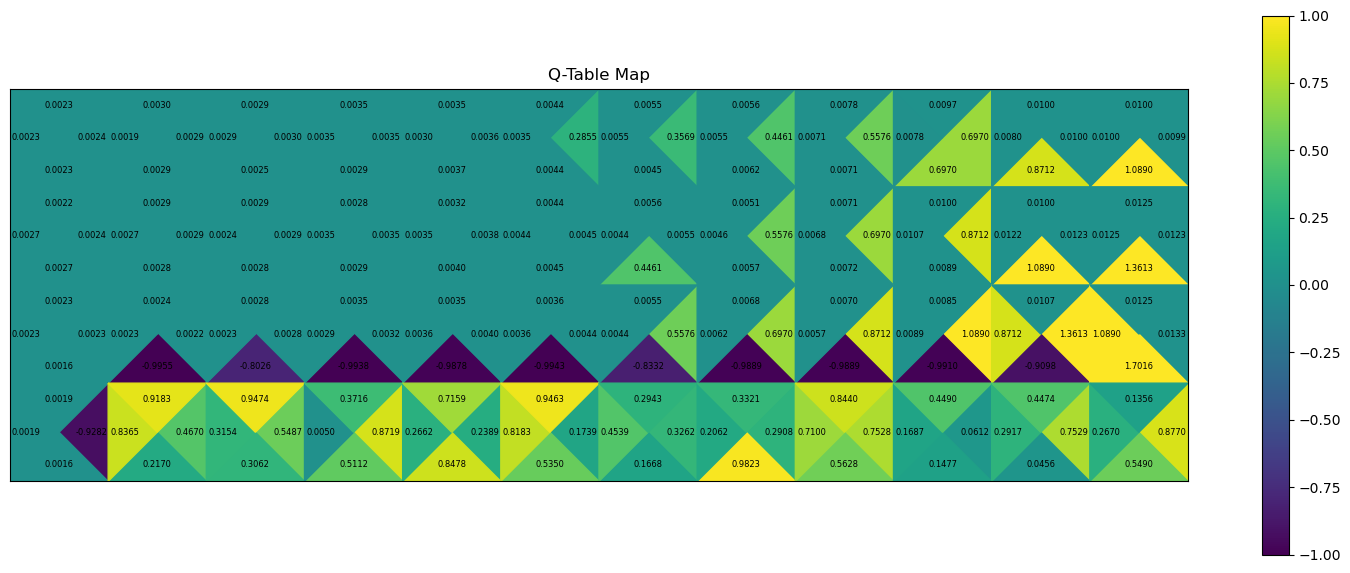

episodes # 19 / 70
Done in 21 steps



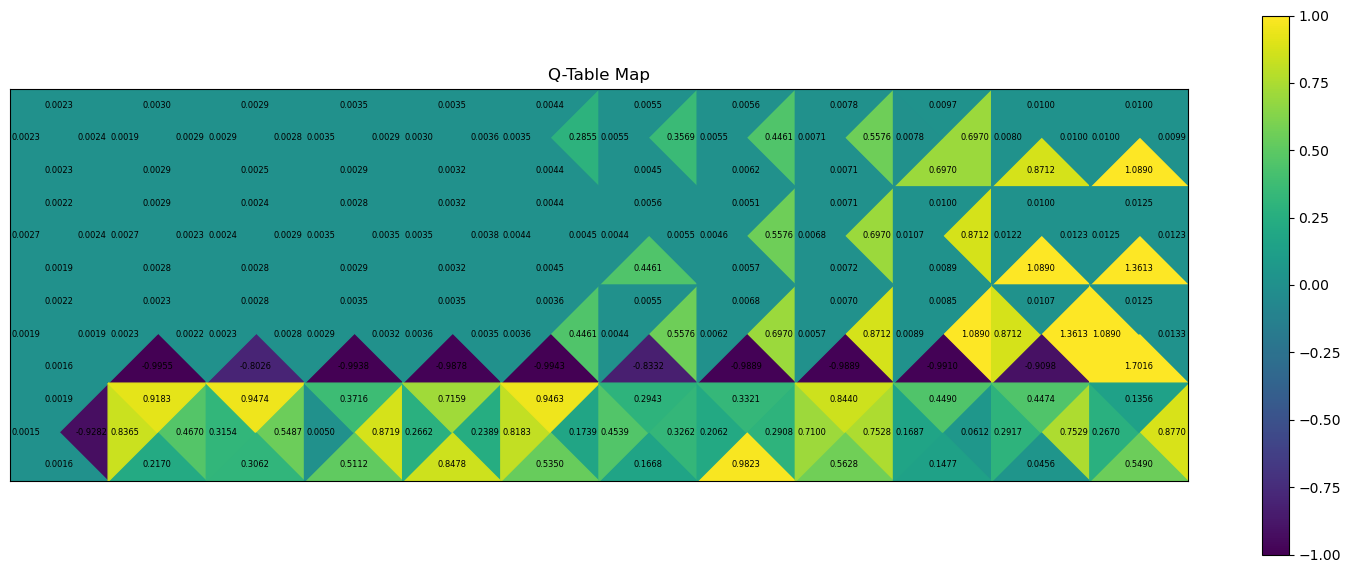

episodes # 20 / 70
Done in 32 steps



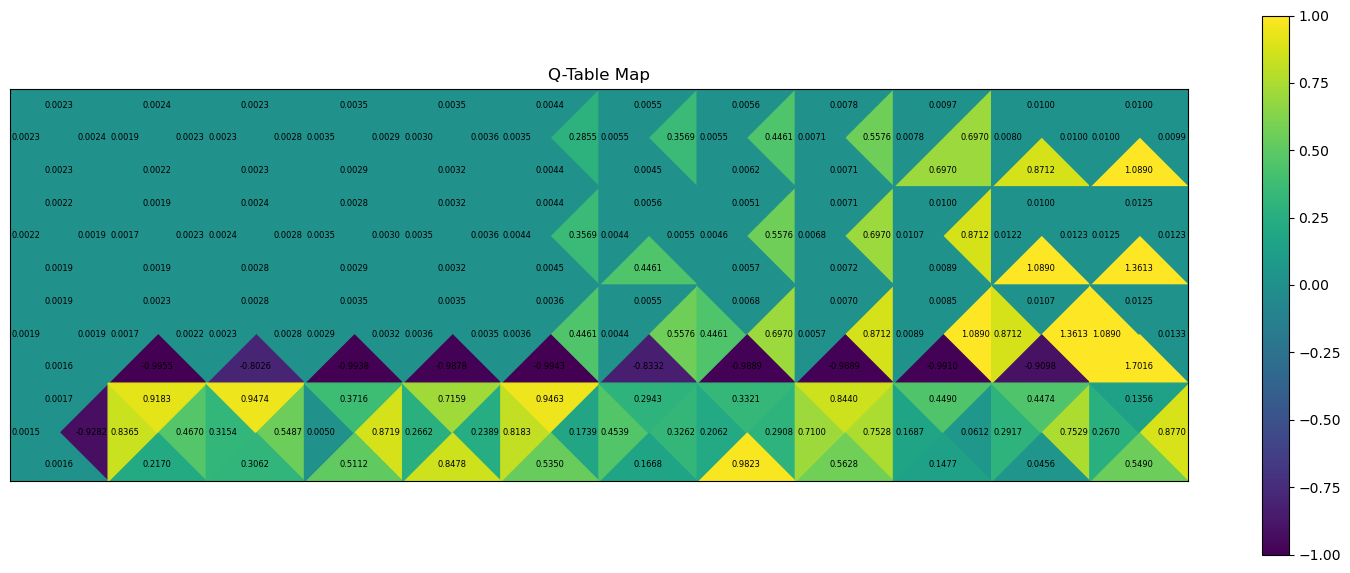

episodes # 21 / 70
Done in 19 steps



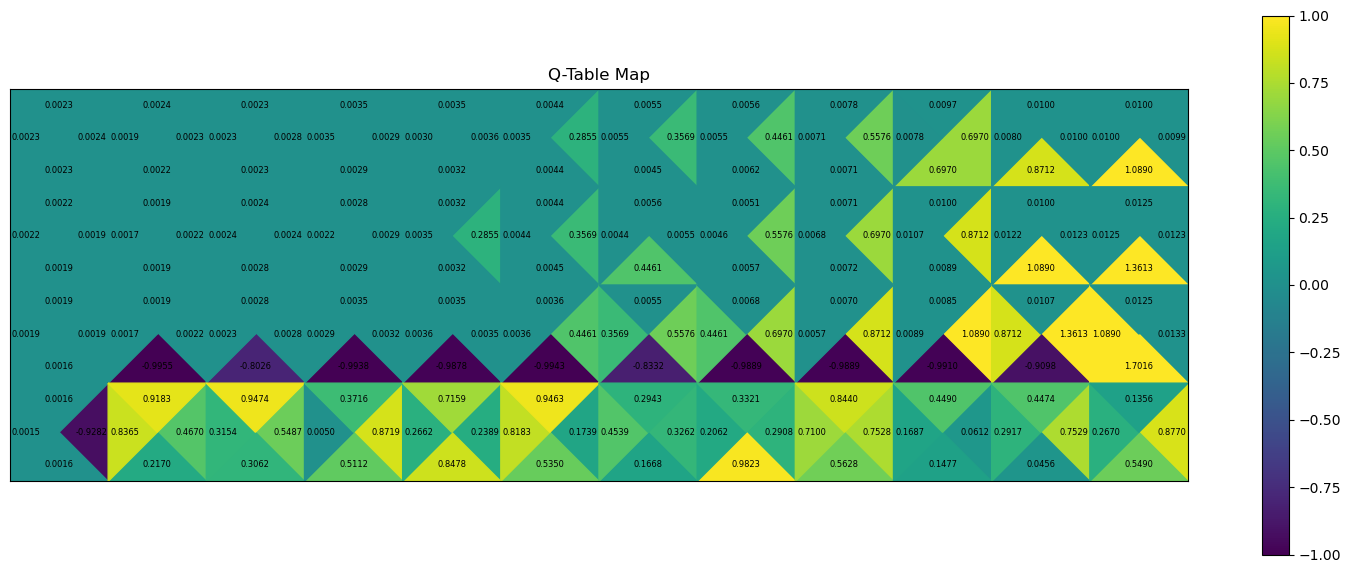

episodes # 22 / 70
Done in 20 steps



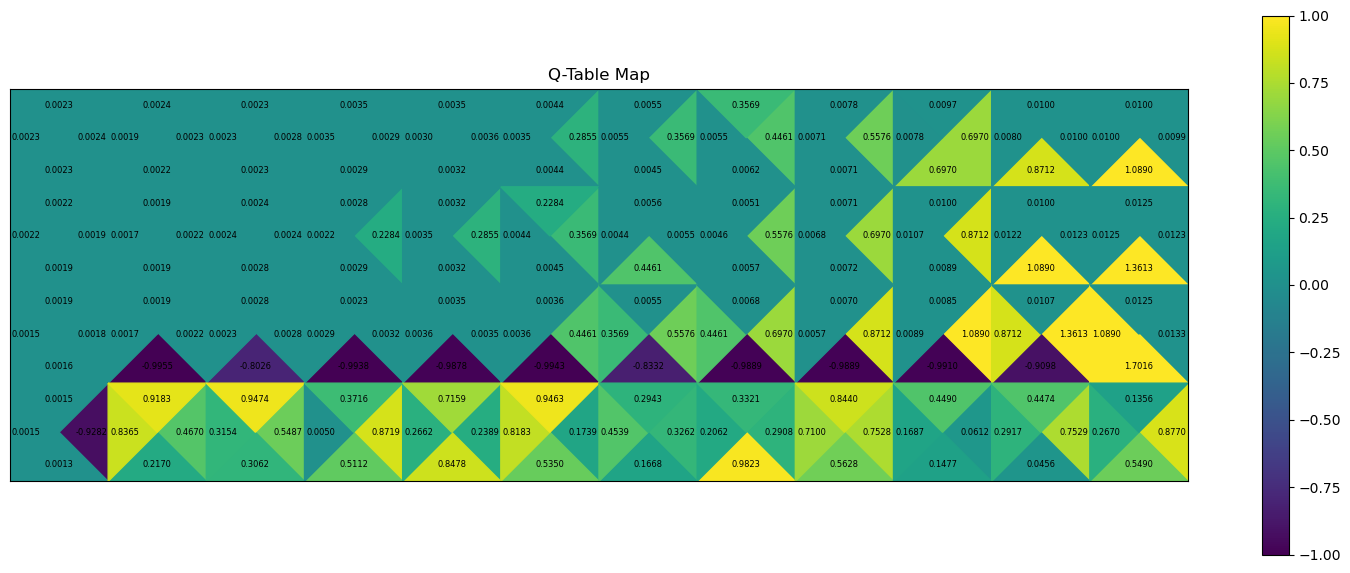

episodes # 23 / 70
Done in 25 steps



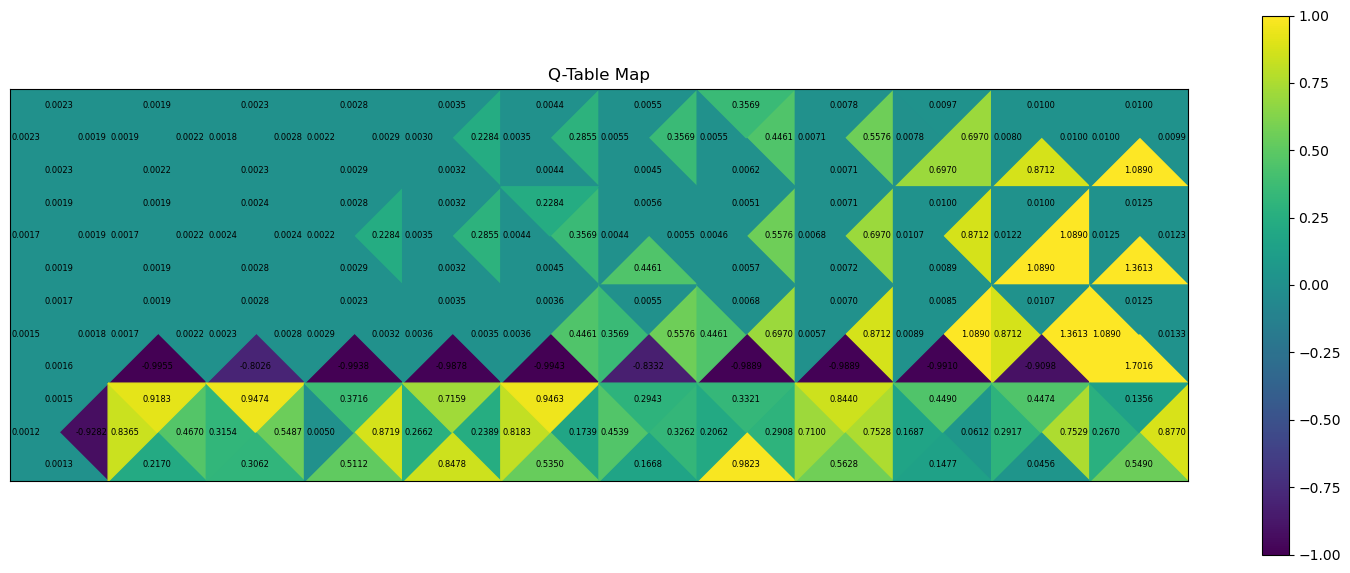

episodes # 24 / 70
Done in 16 steps



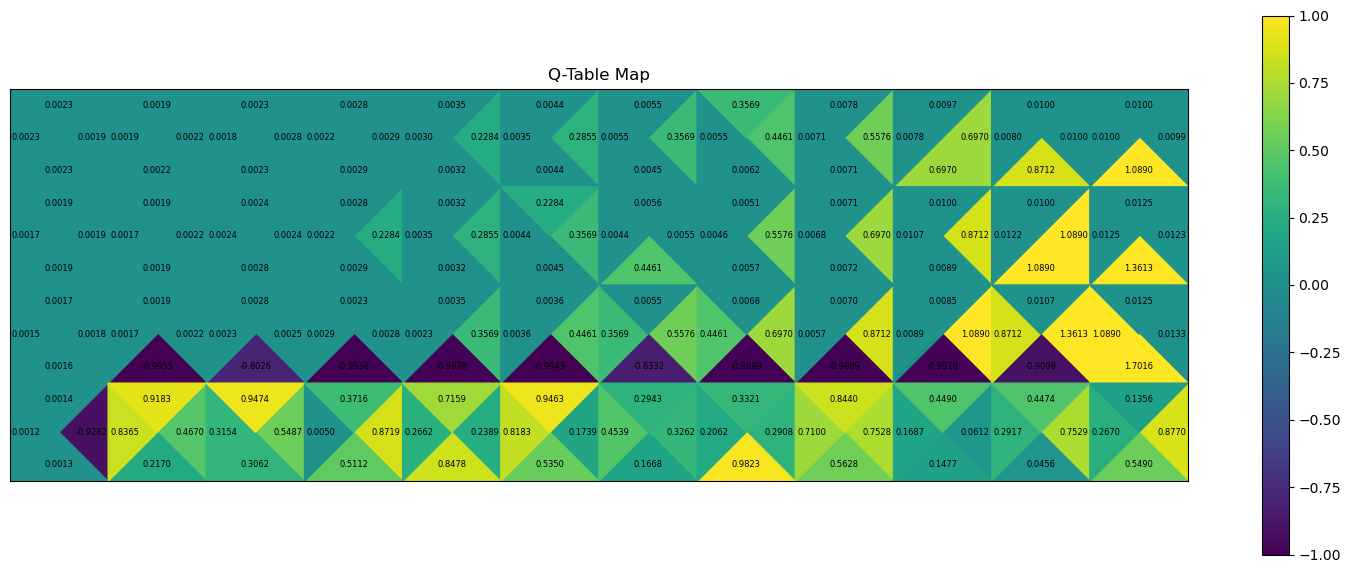

episodes # 25 / 70
Done in 27 steps



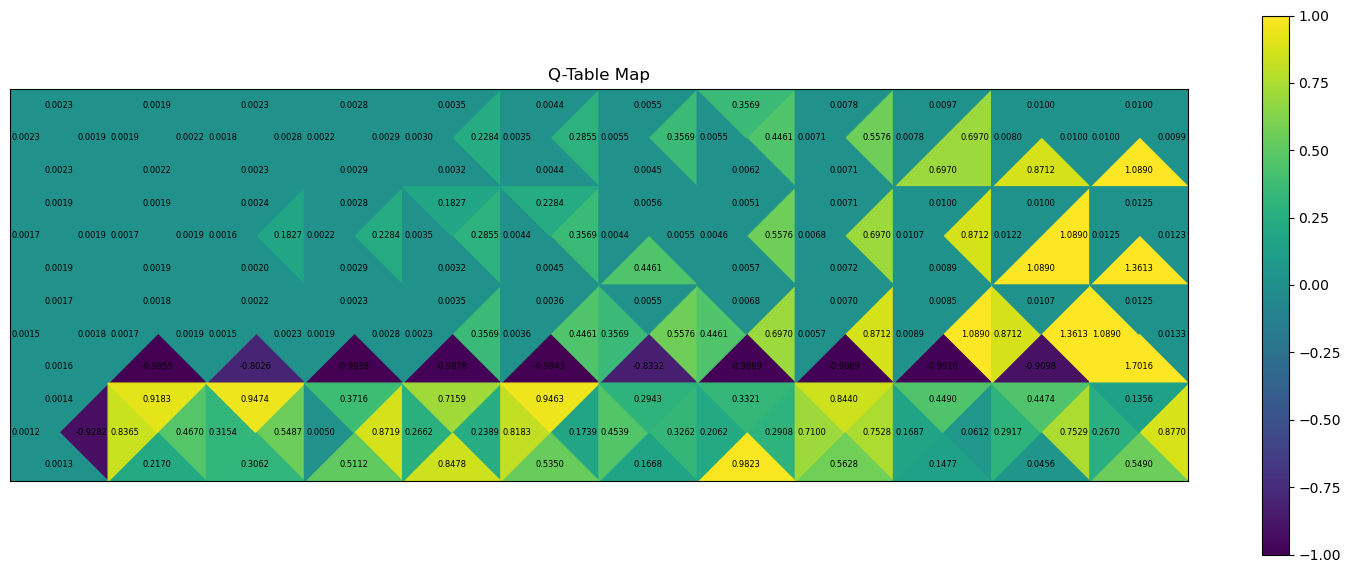

episodes # 26 / 70
Done in 13 steps



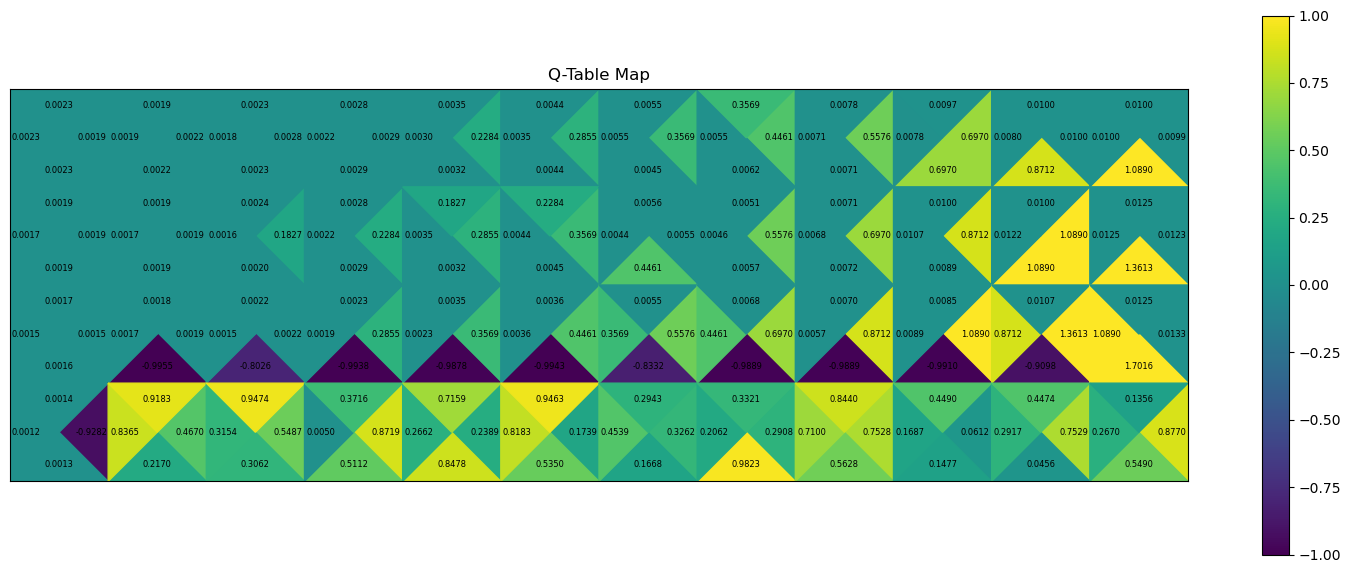

episodes # 27 / 70
Done in 17 steps



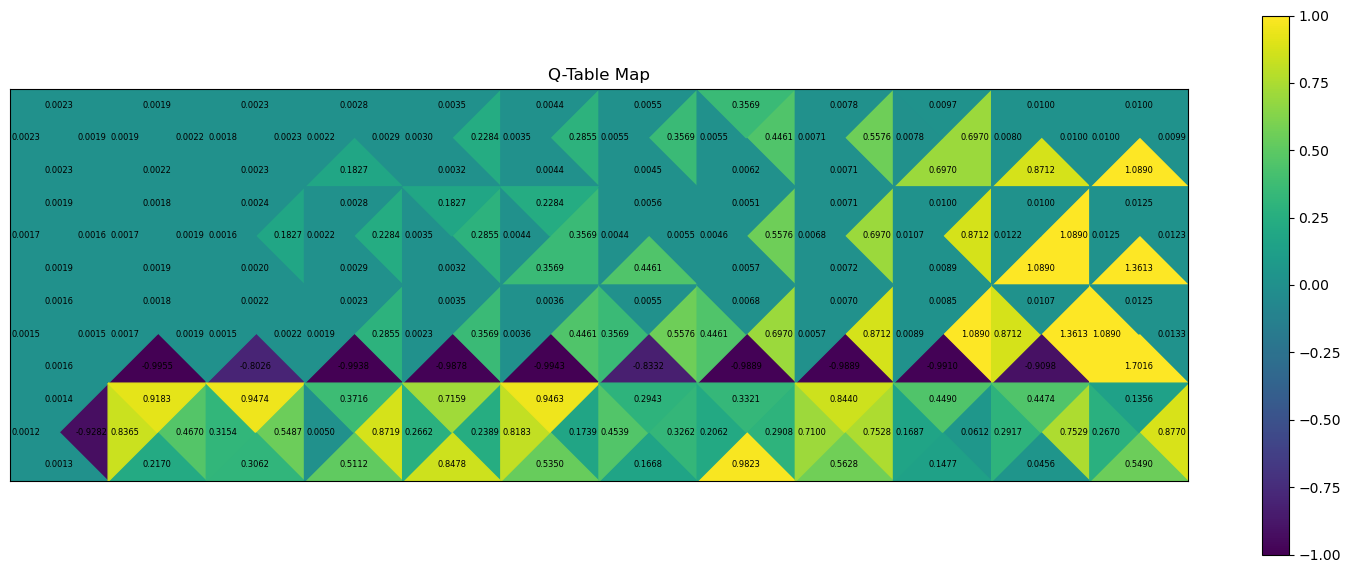

episodes # 28 / 70
Done in 24 steps



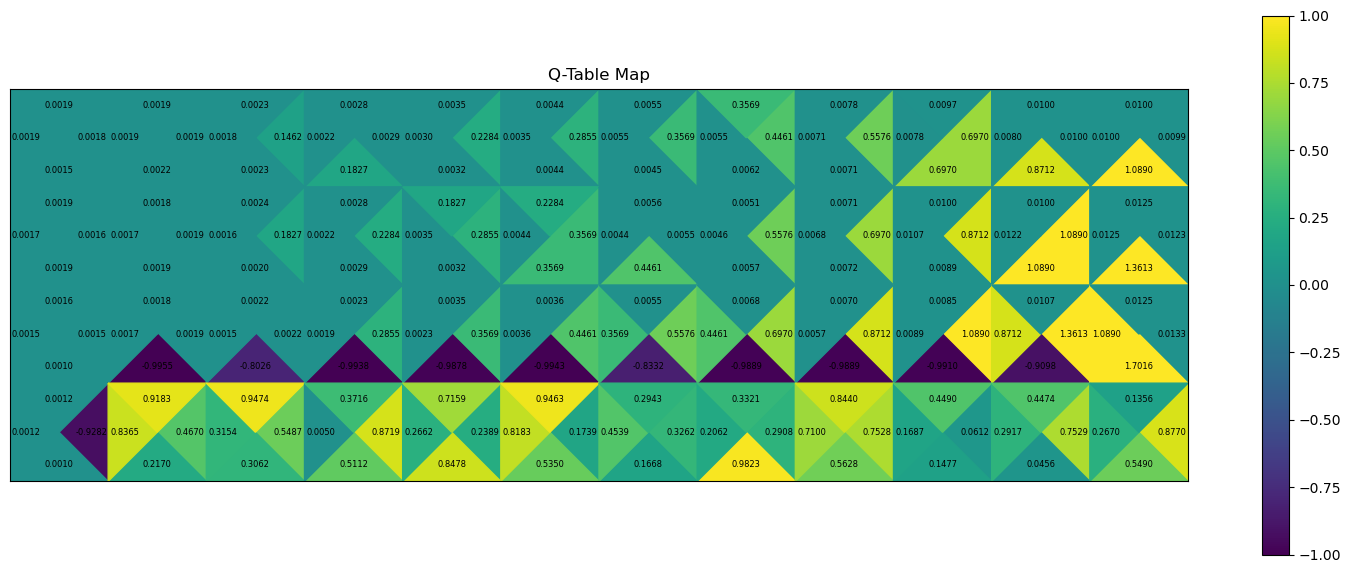

episodes # 29 / 70
Done in 21 steps



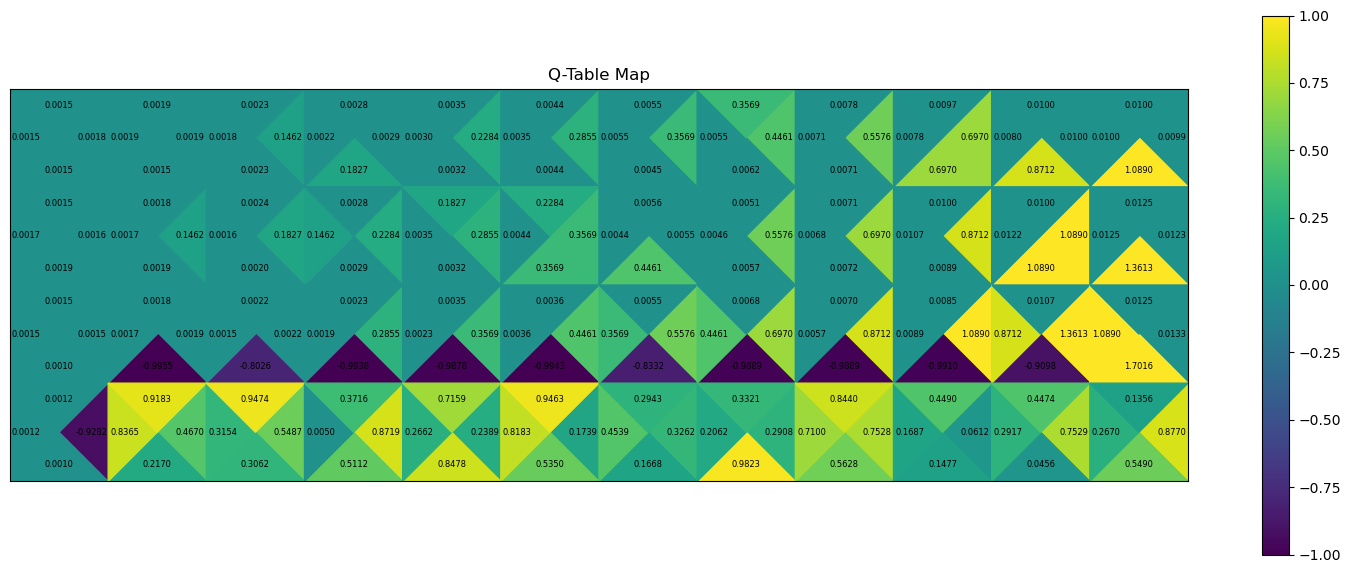

episodes # 30 / 70
Done in 24 steps



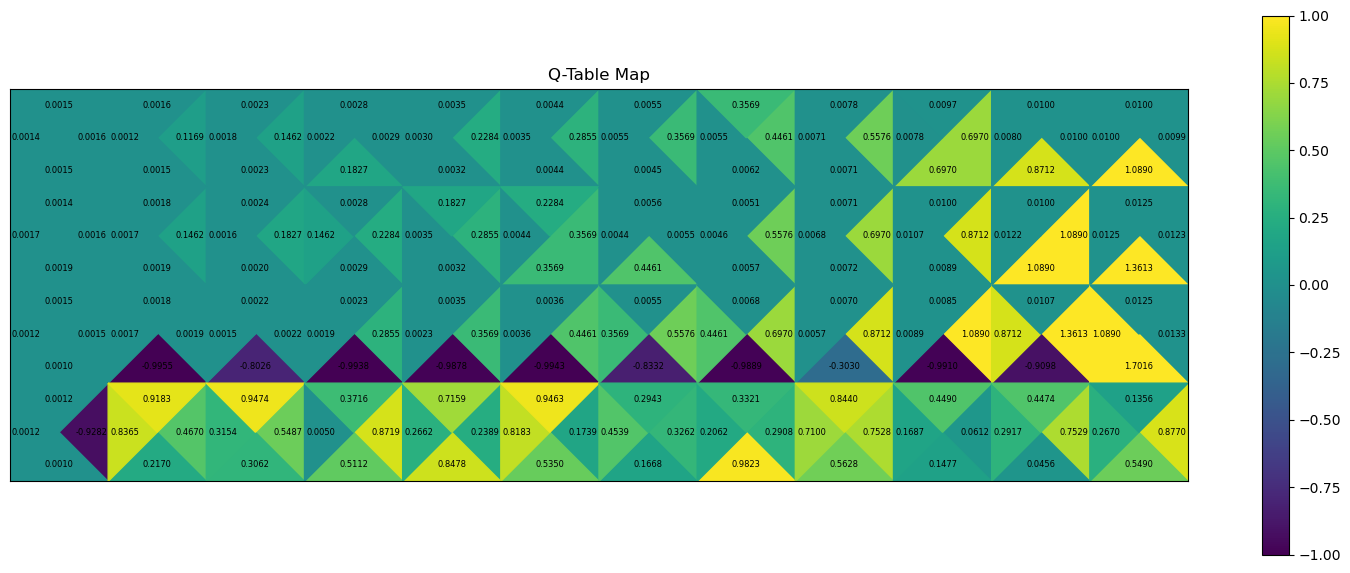

episodes # 31 / 70
Done in 18 steps



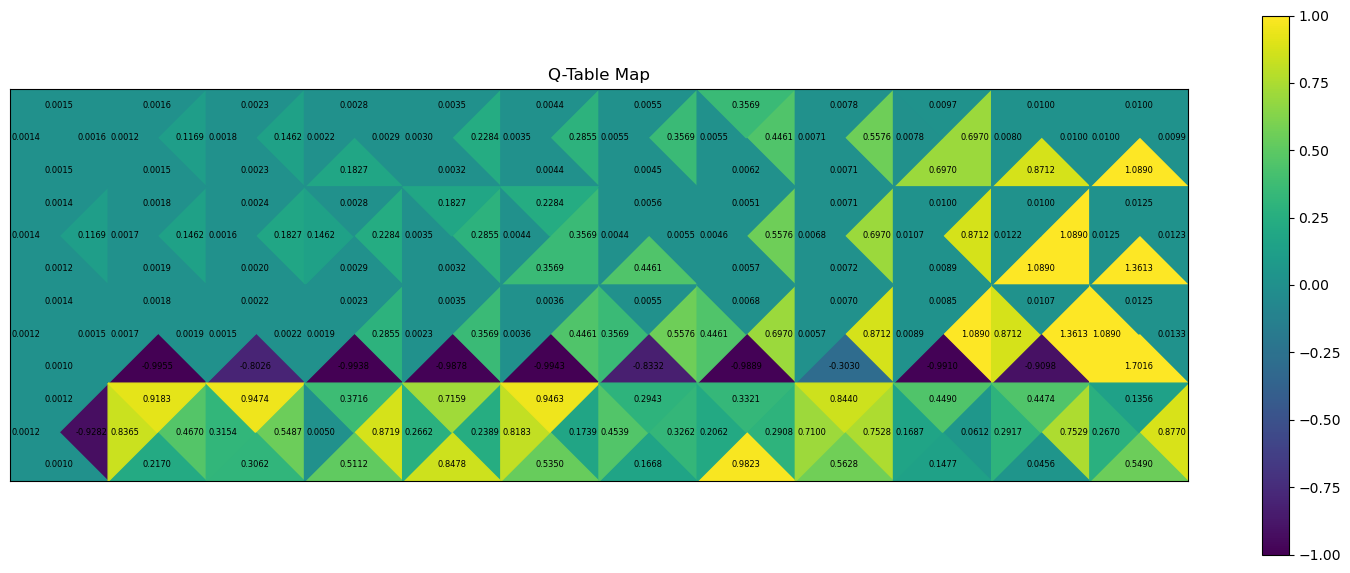

episodes # 32 / 70
Done in 13 steps



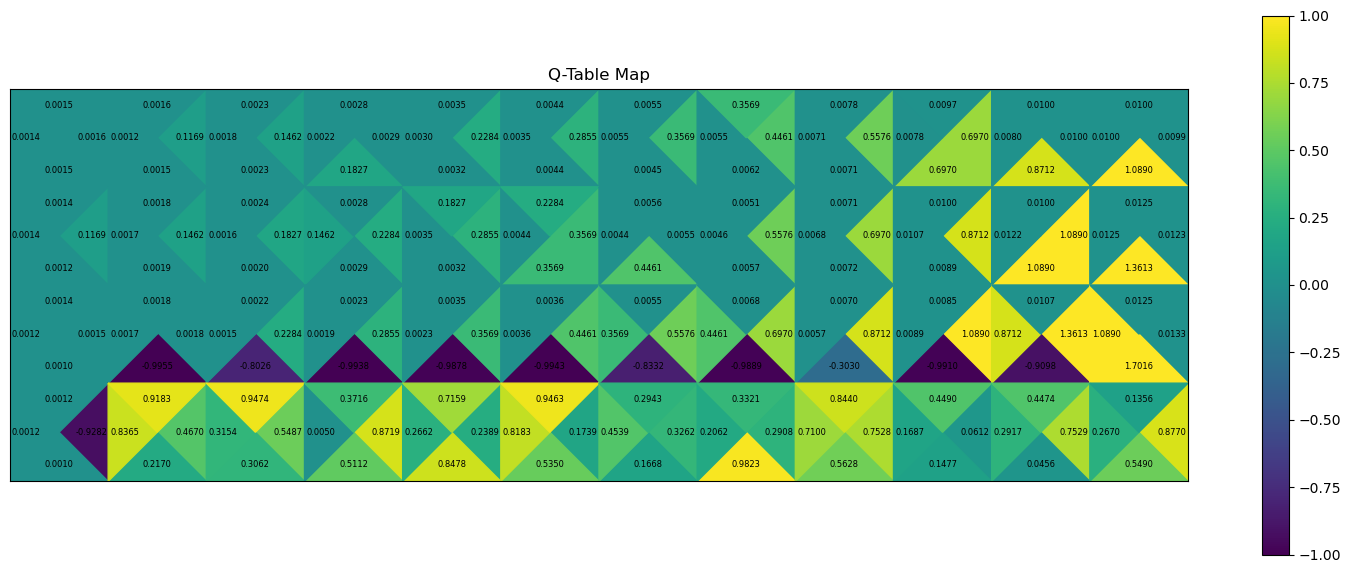

episodes # 33 / 70
Done in 14 steps



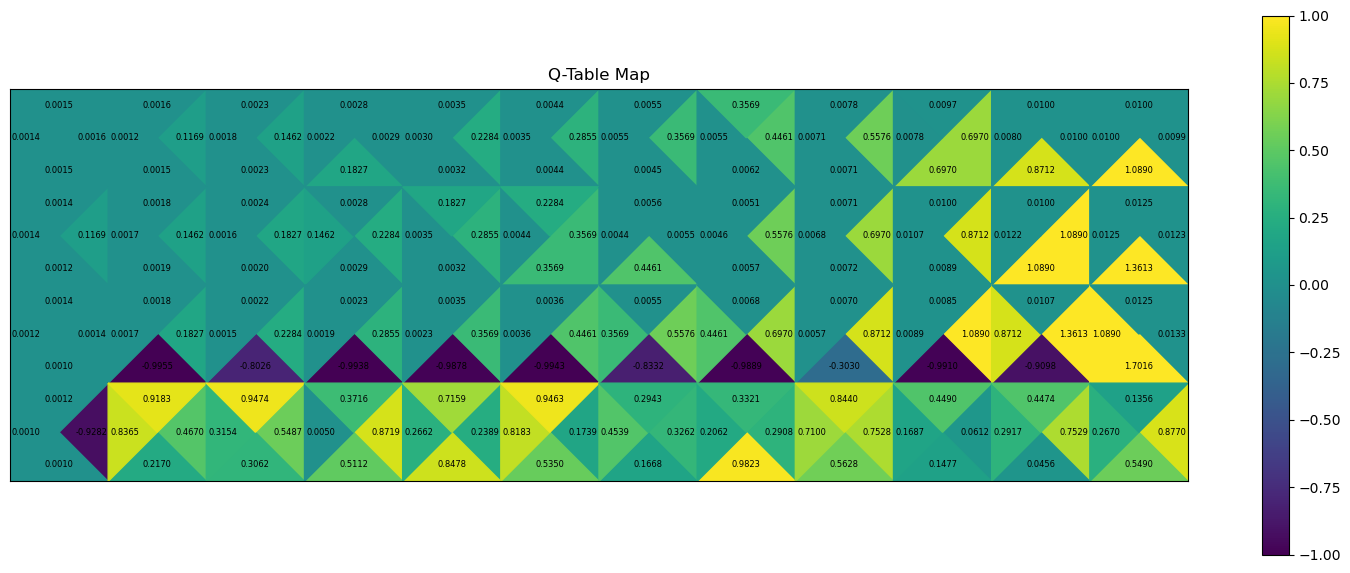

episodes # 34 / 70
Done in 18 steps



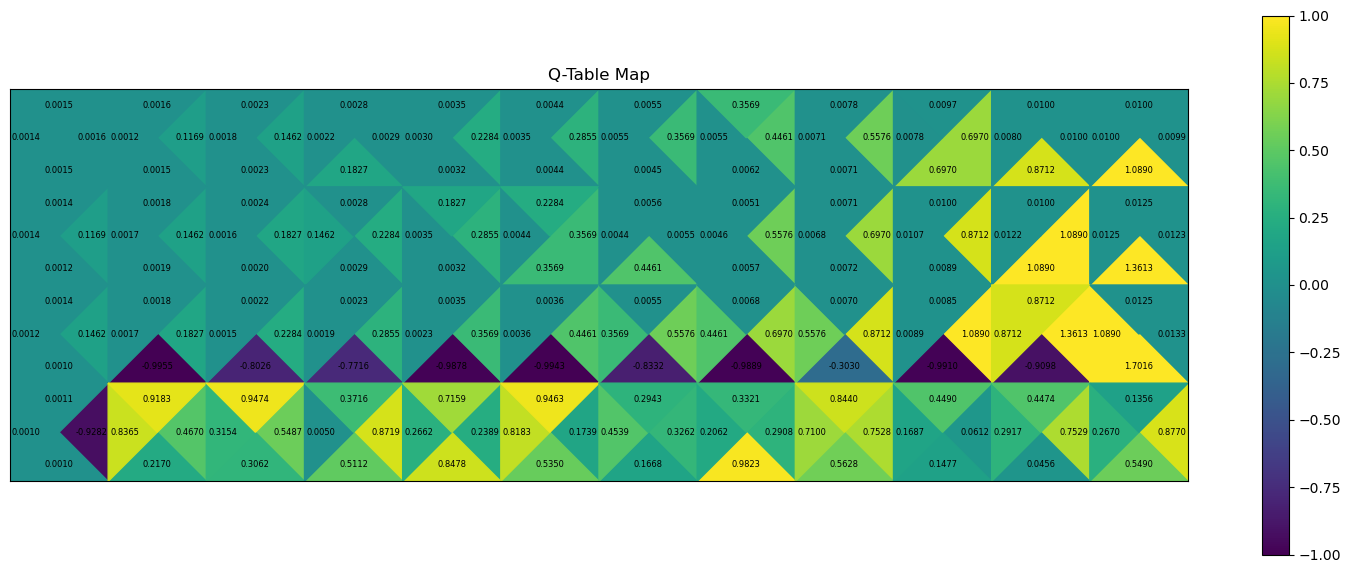

episodes # 35 / 70
Done in 13 steps



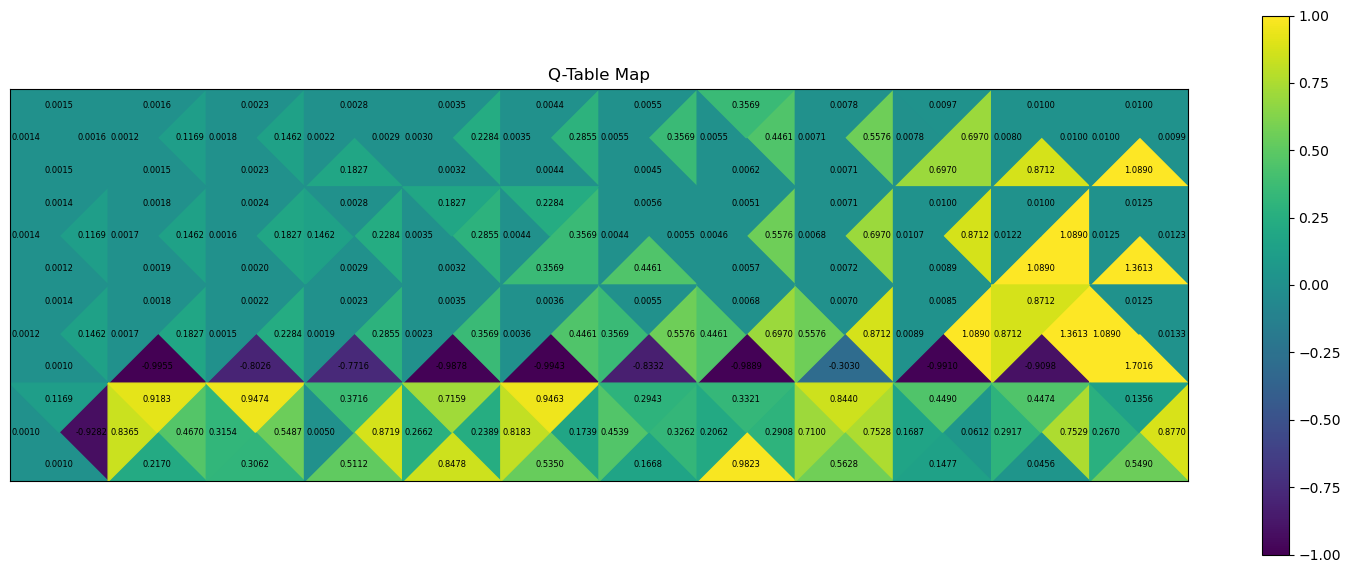

episodes # 36 / 70
Done in 13 steps



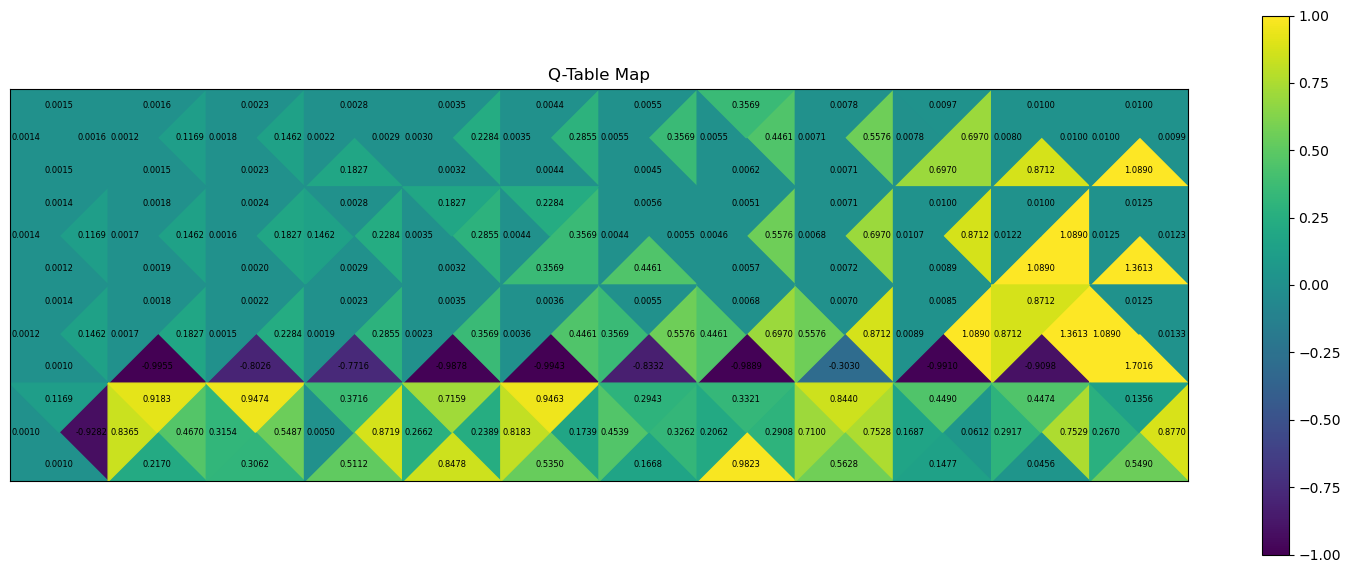

episodes # 37 / 70
Done in 14 steps



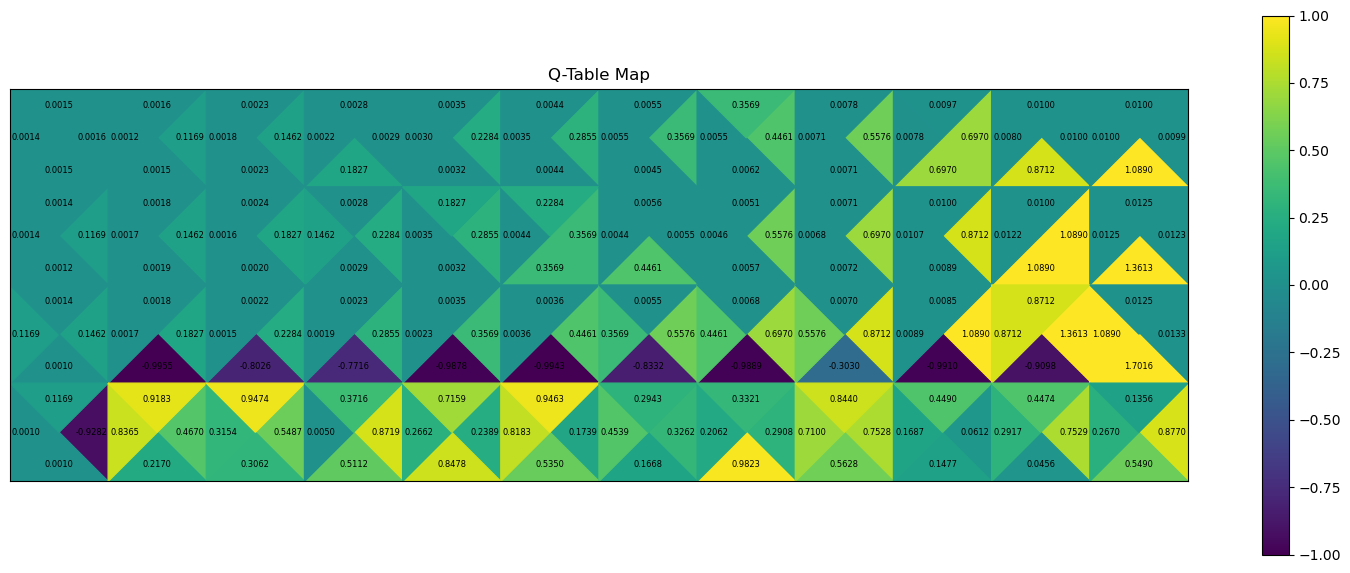

episodes # 38 / 70
Done in 16 steps



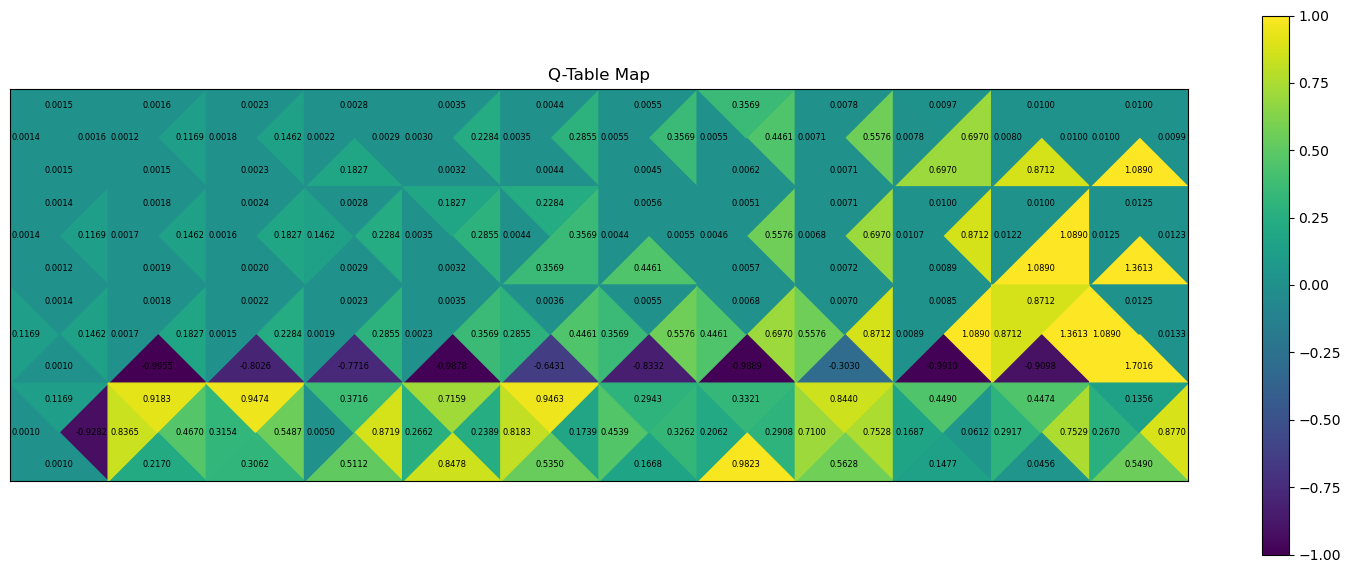

episodes # 39 / 70
Done in 17 steps



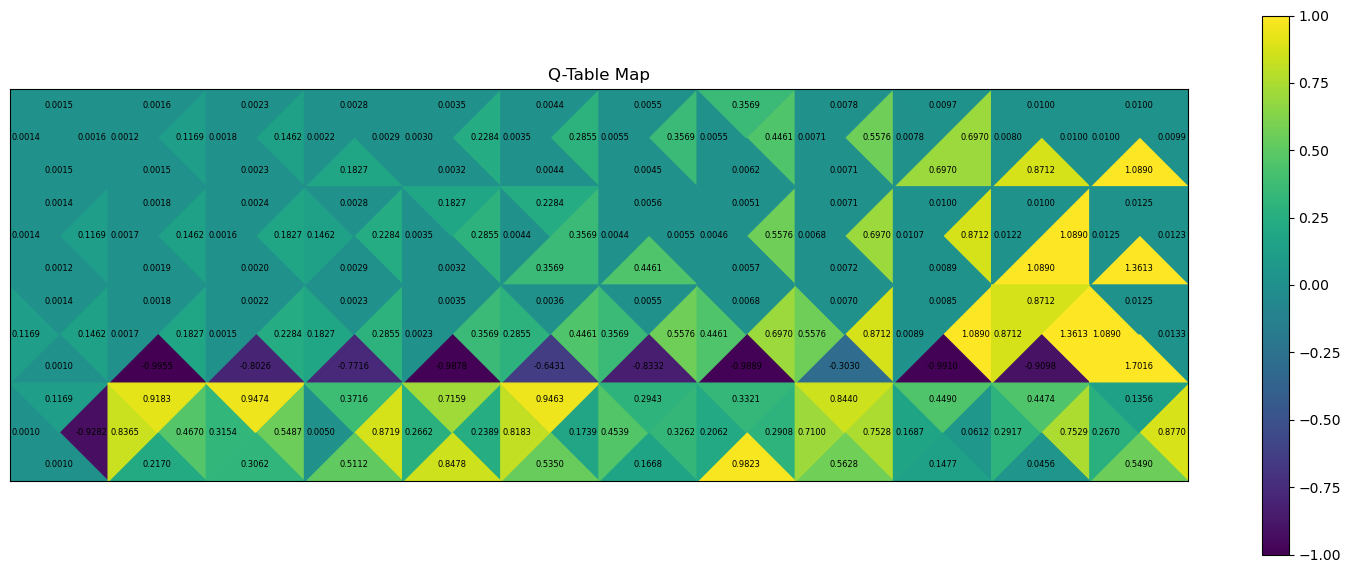

episodes # 40 / 70
Done in 13 steps



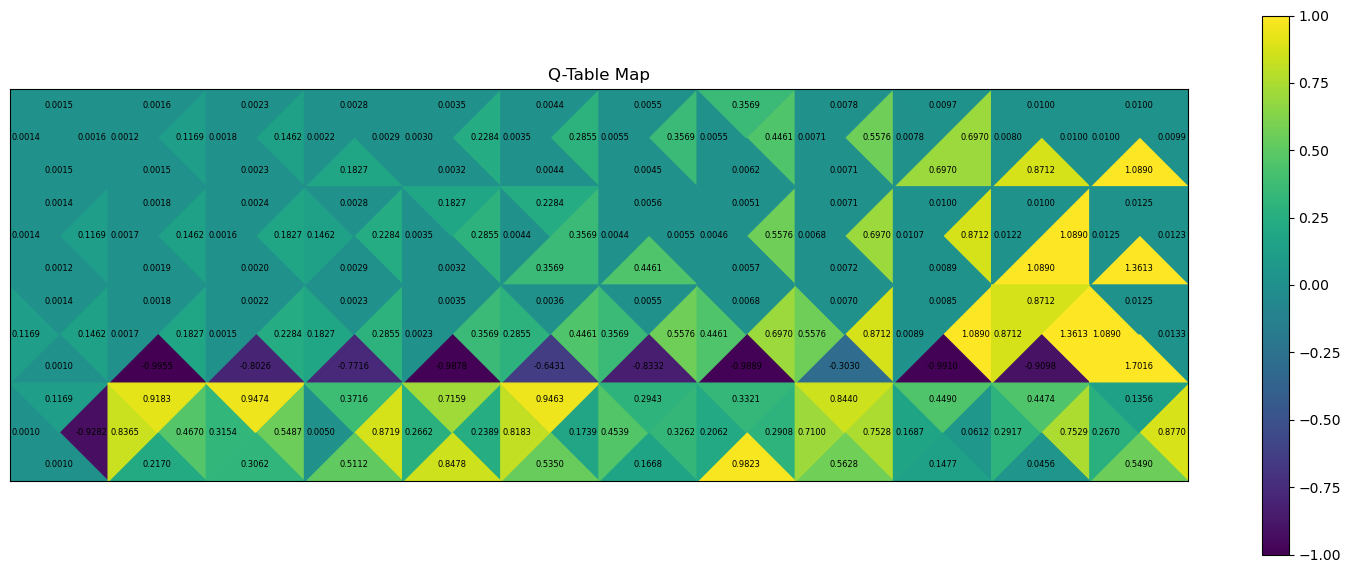

episodes # 41 / 70
Done in 13 steps



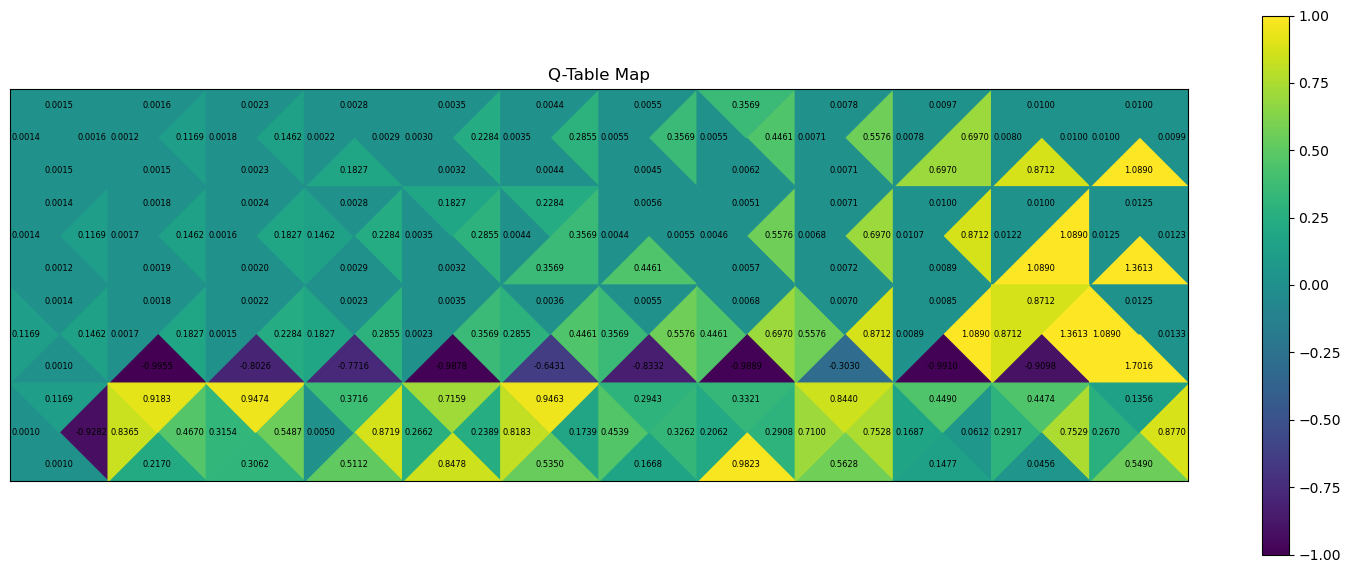

episodes # 42 / 70
Done in 14 steps



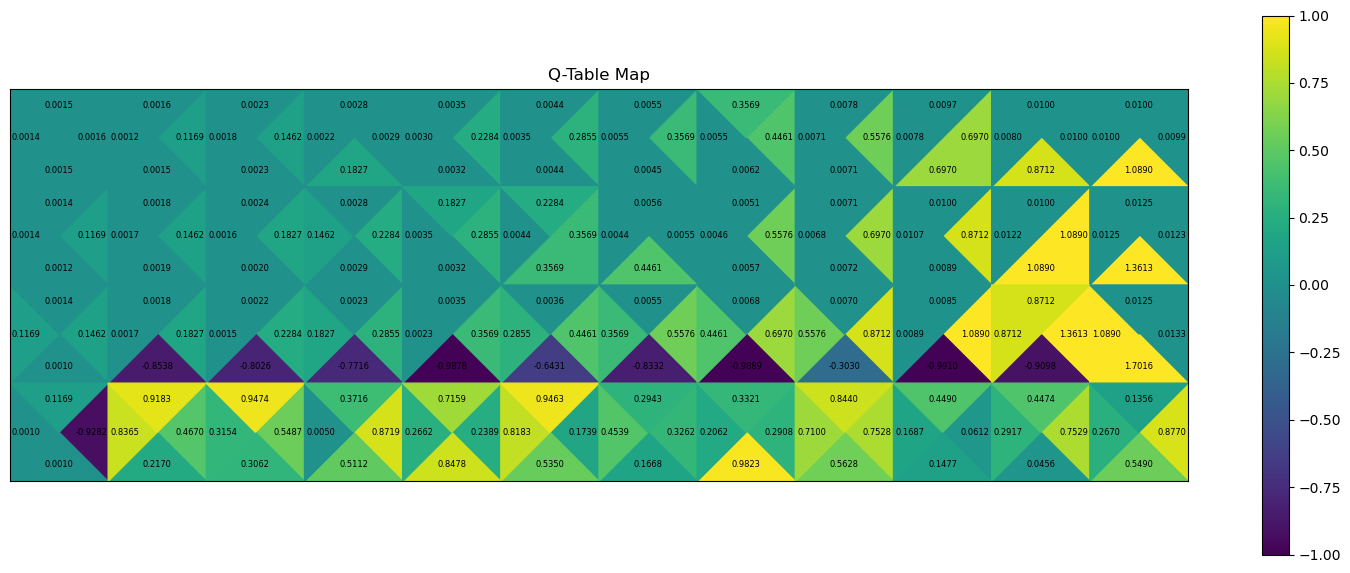

episodes # 43 / 70
Done in 15 steps



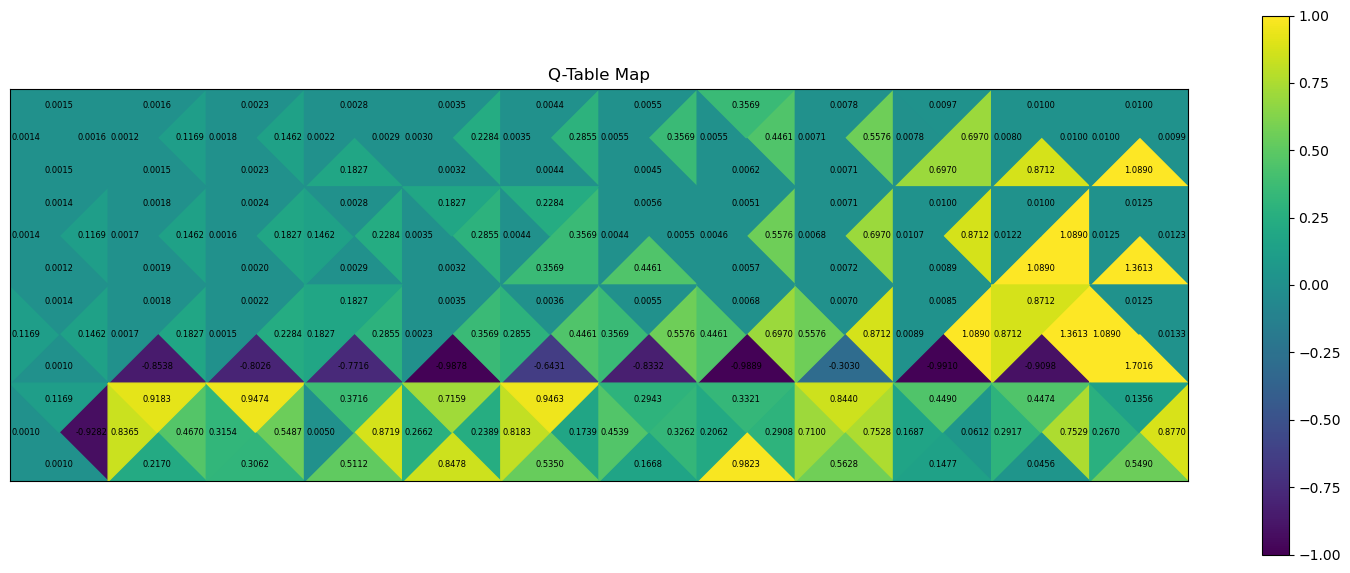

episodes # 44 / 70
Done in 15 steps



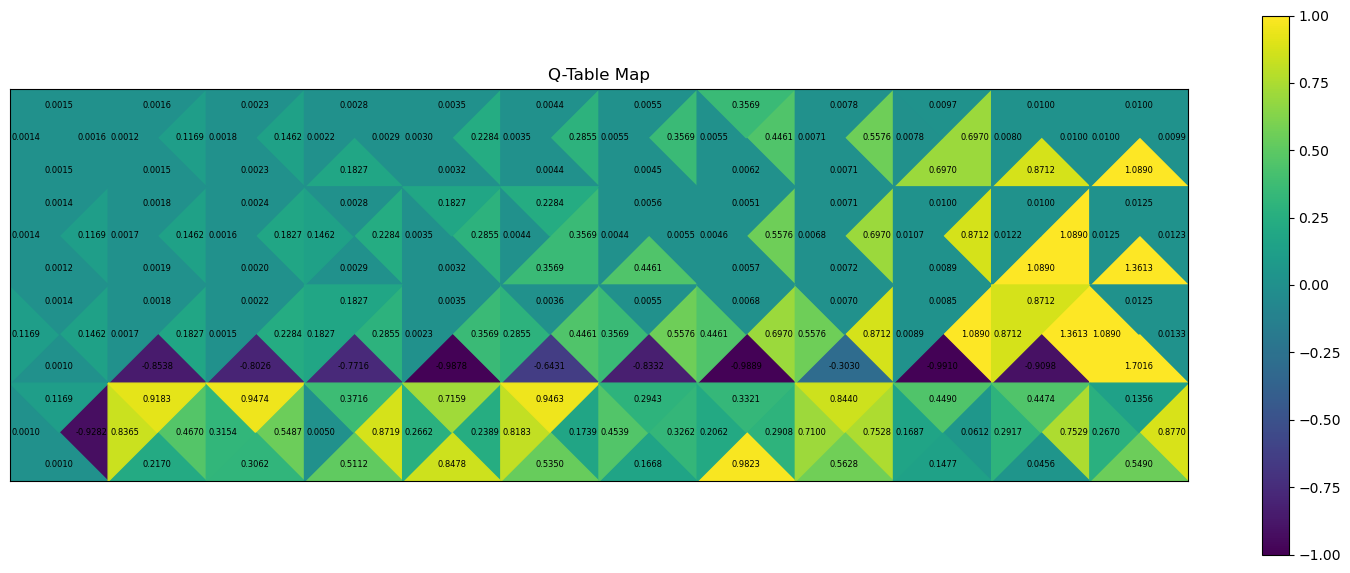

episodes # 45 / 70
Done in 17 steps



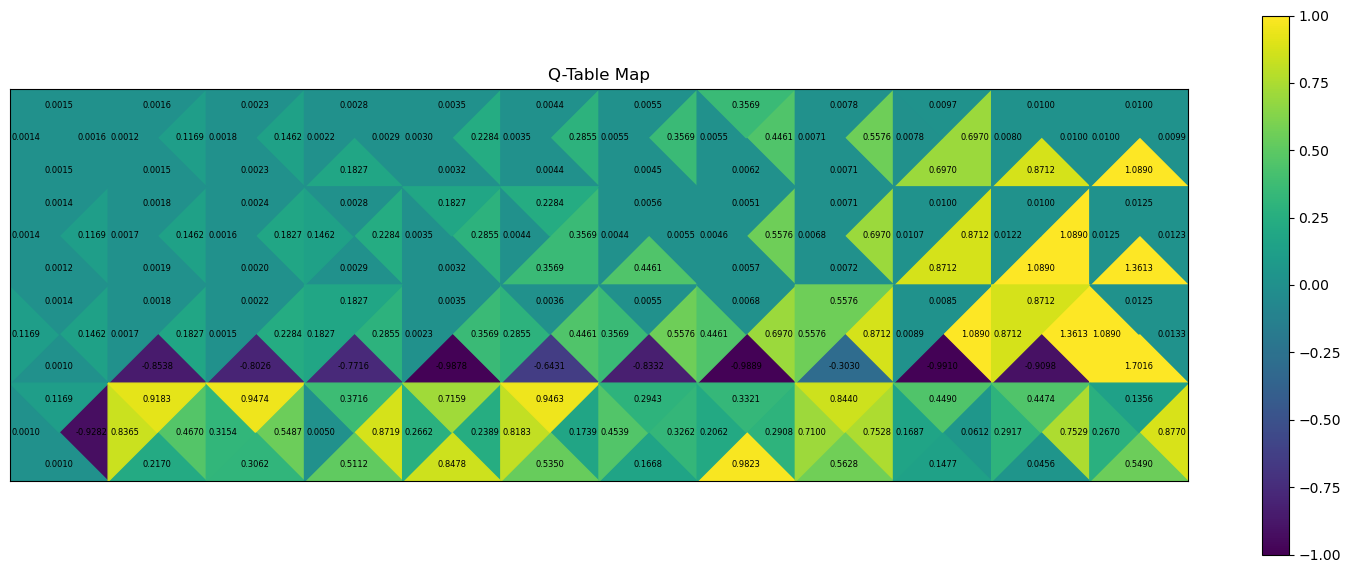

episodes # 46 / 70
Done in 13 steps



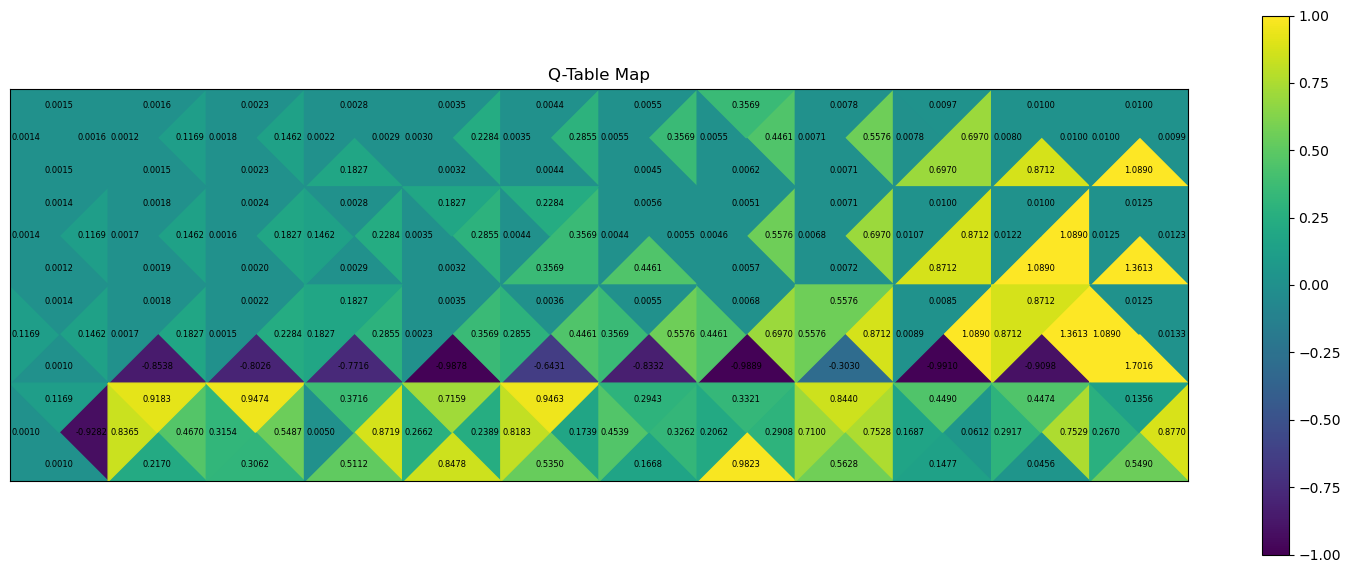

episodes # 47 / 70
Done in 13 steps



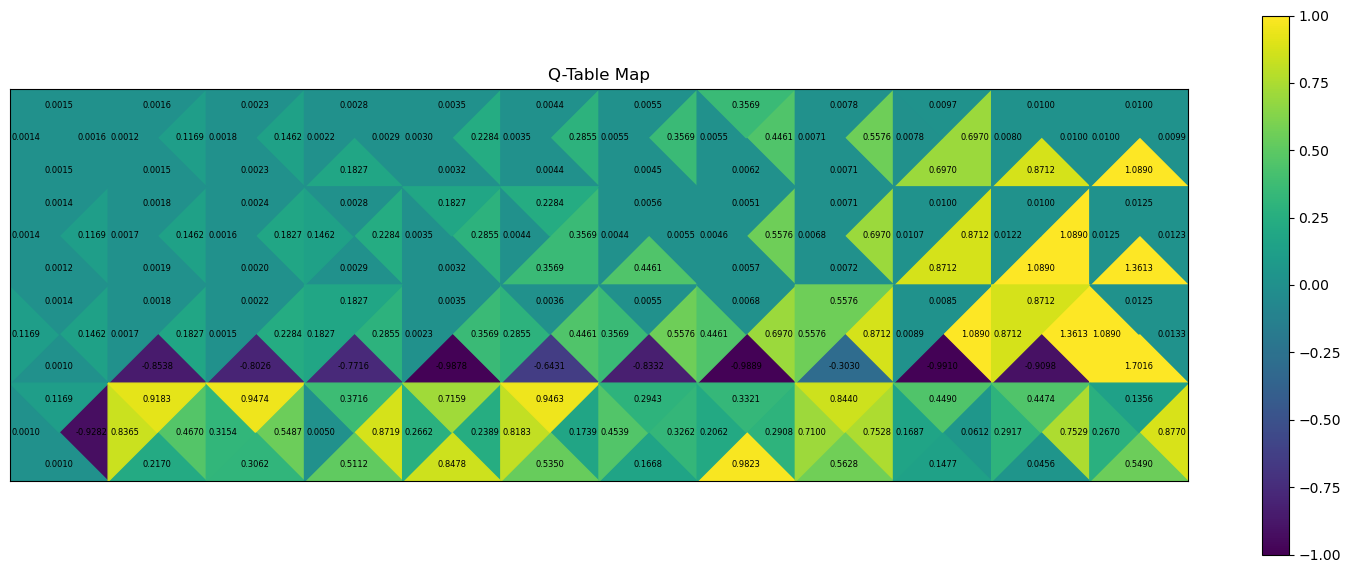

episodes # 48 / 70
Done in 14 steps



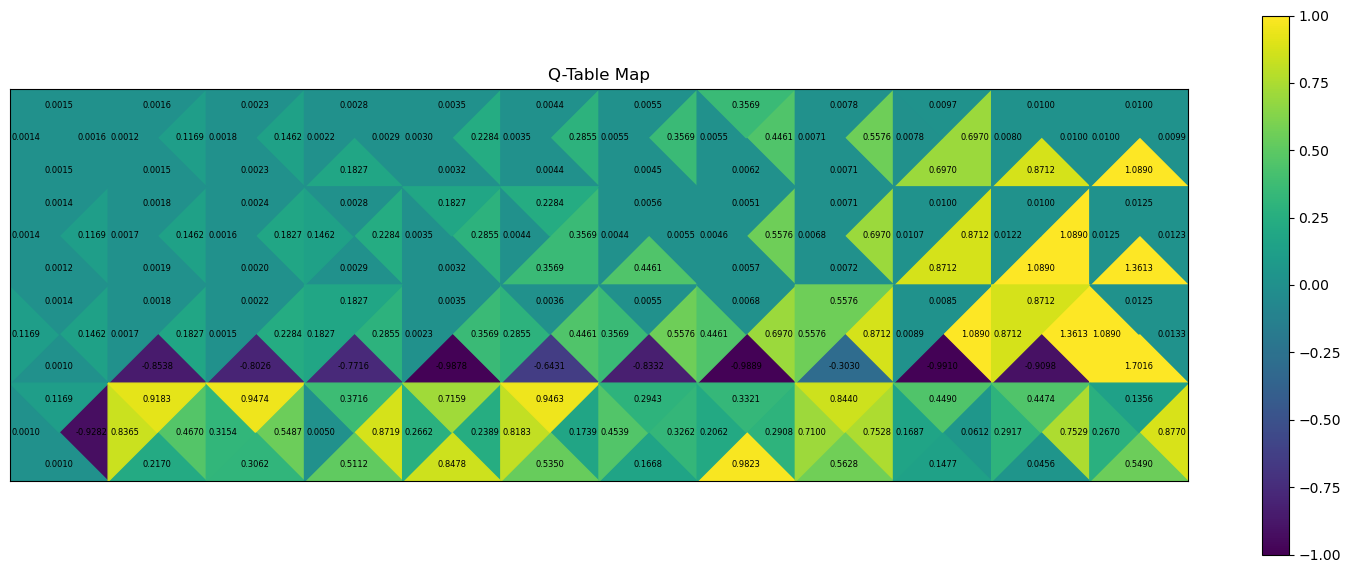

episodes # 49 / 70
Done in 18 steps



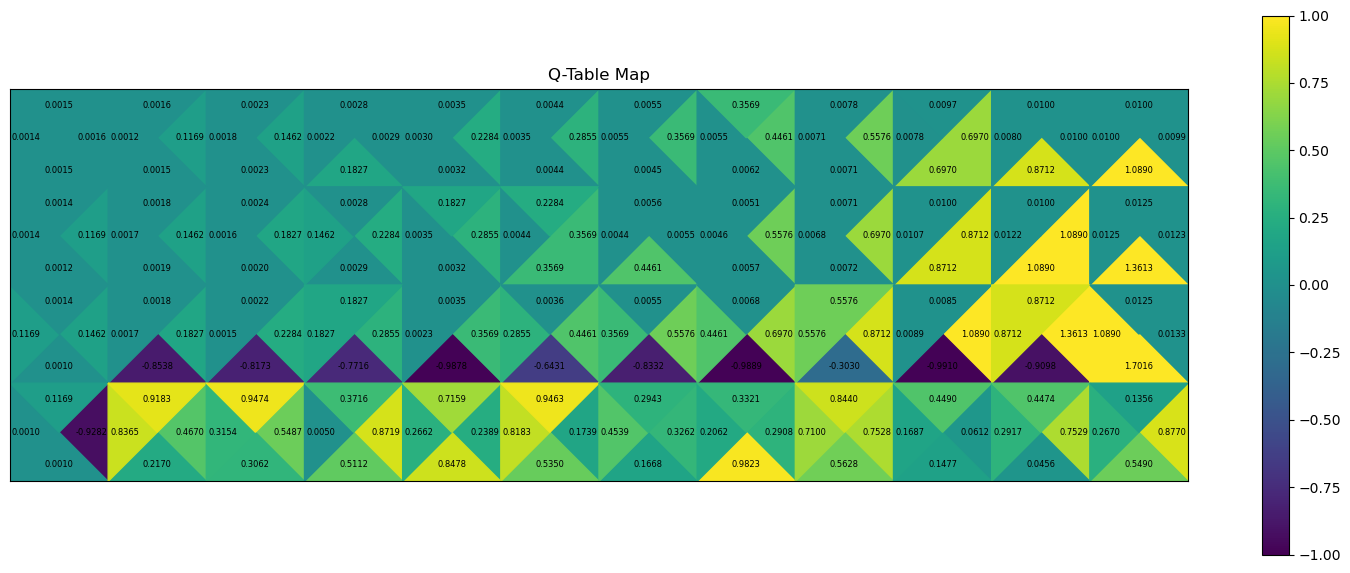

episodes # 50 / 70
Done in 13 steps



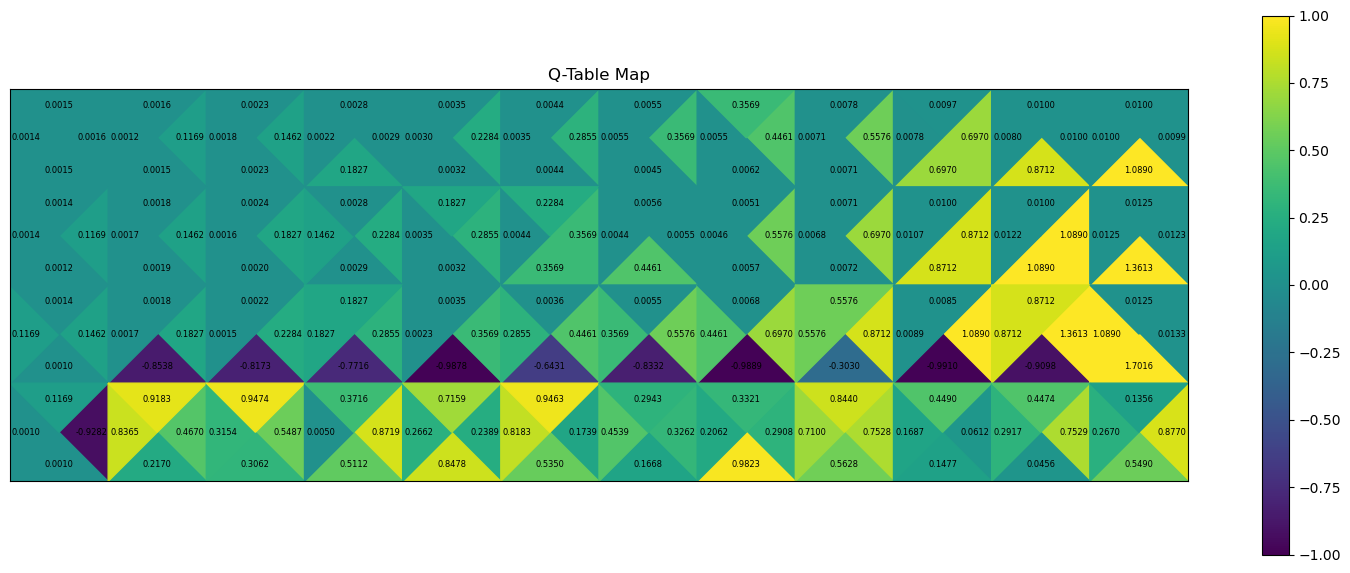

episodes # 51 / 70
Done in 14 steps



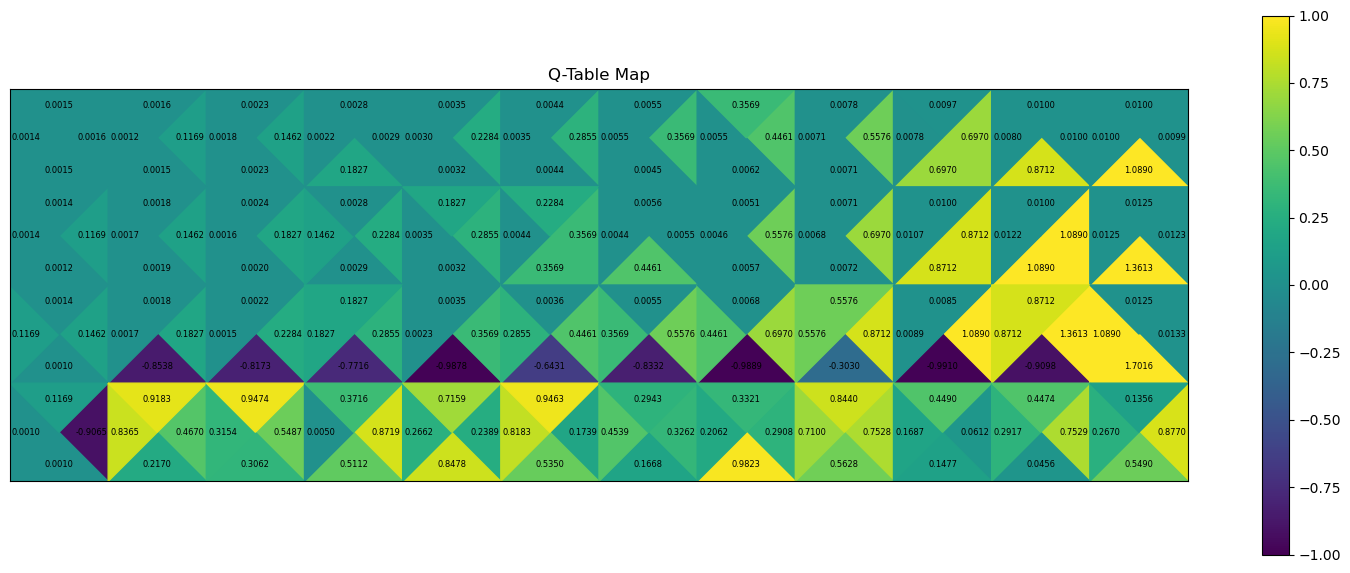

episodes # 52 / 70
Done in 13 steps



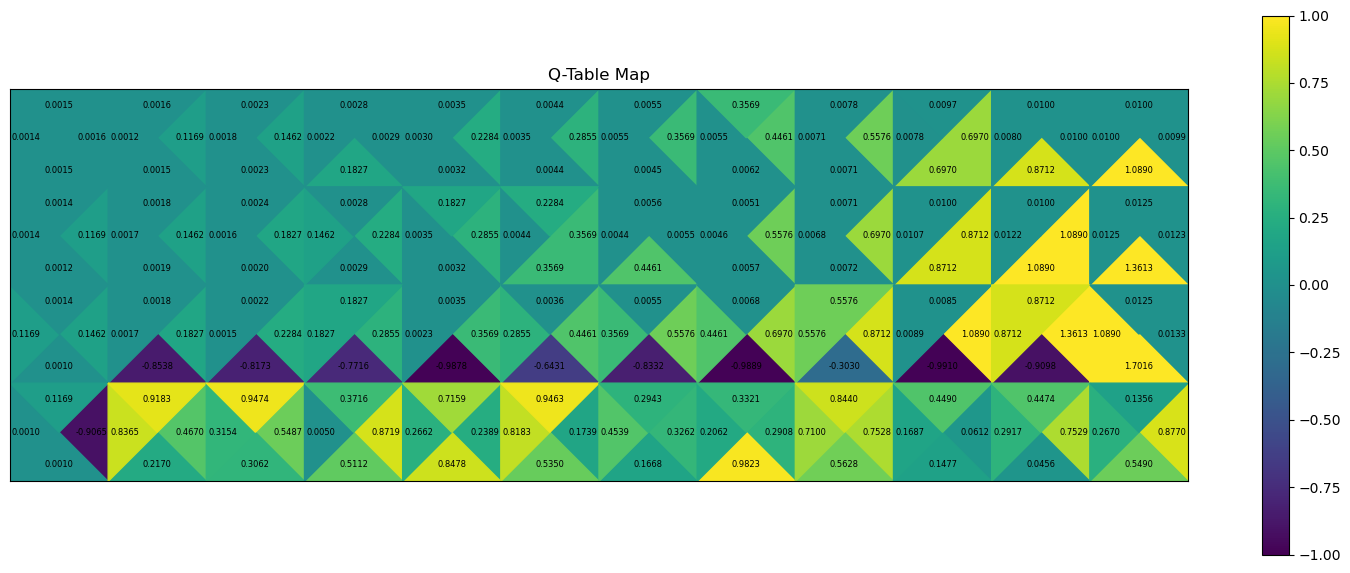

episodes # 53 / 70
Done in 13 steps



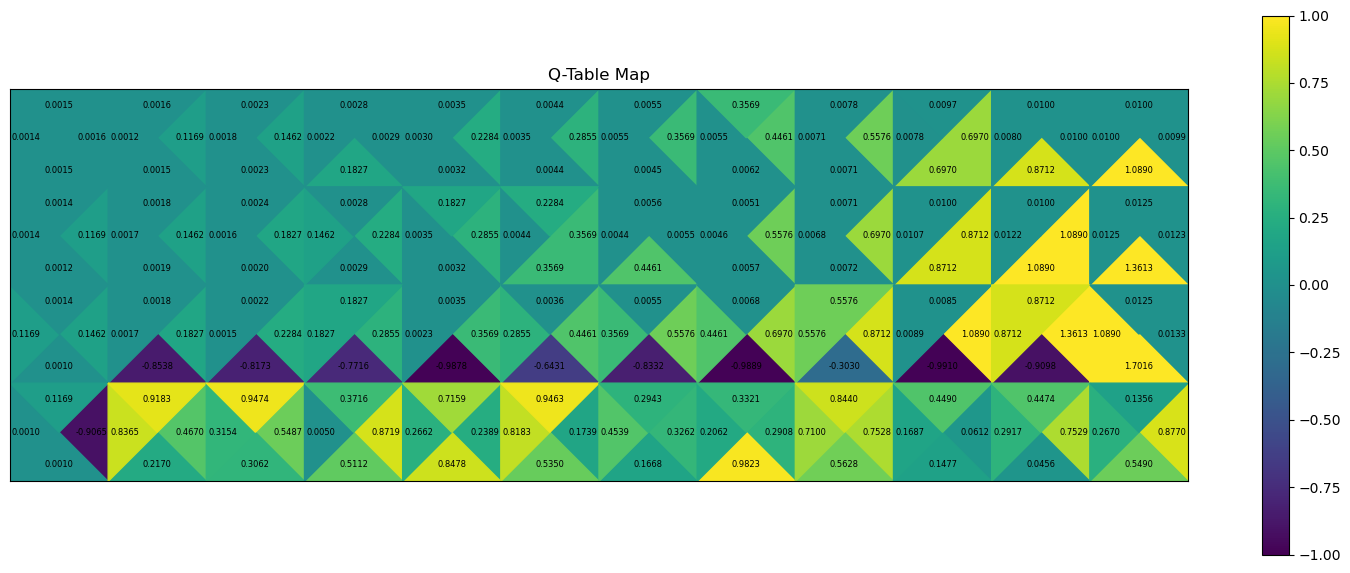

episodes # 54 / 70
Done in 13 steps



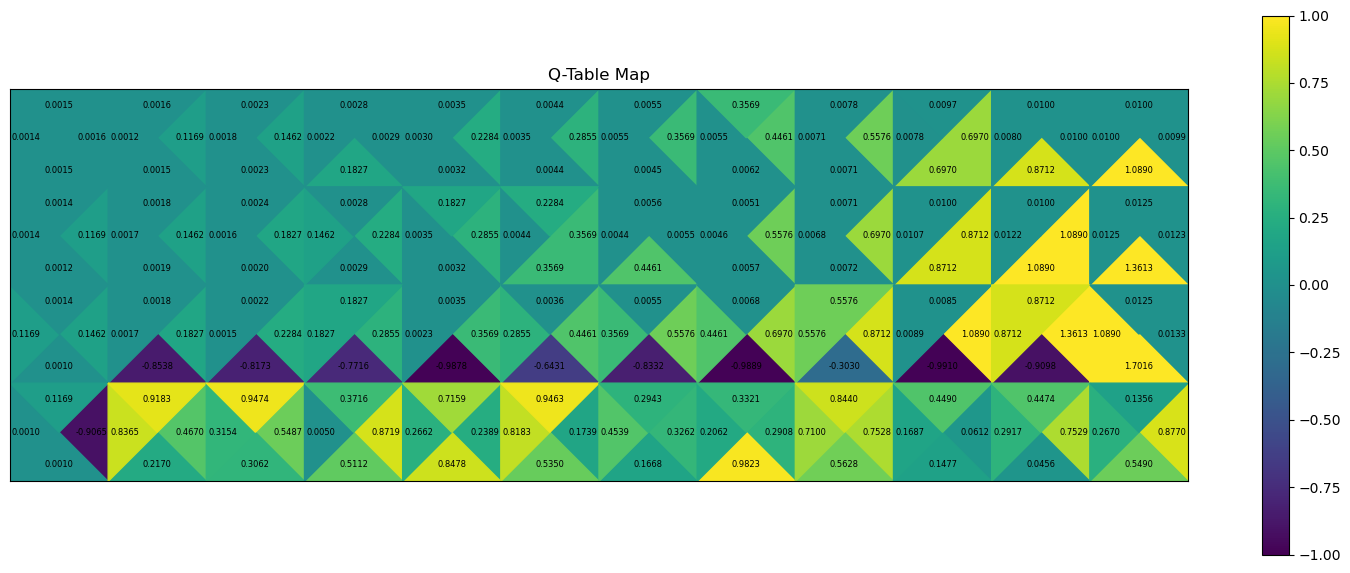

episodes # 55 / 70
Done in 13 steps



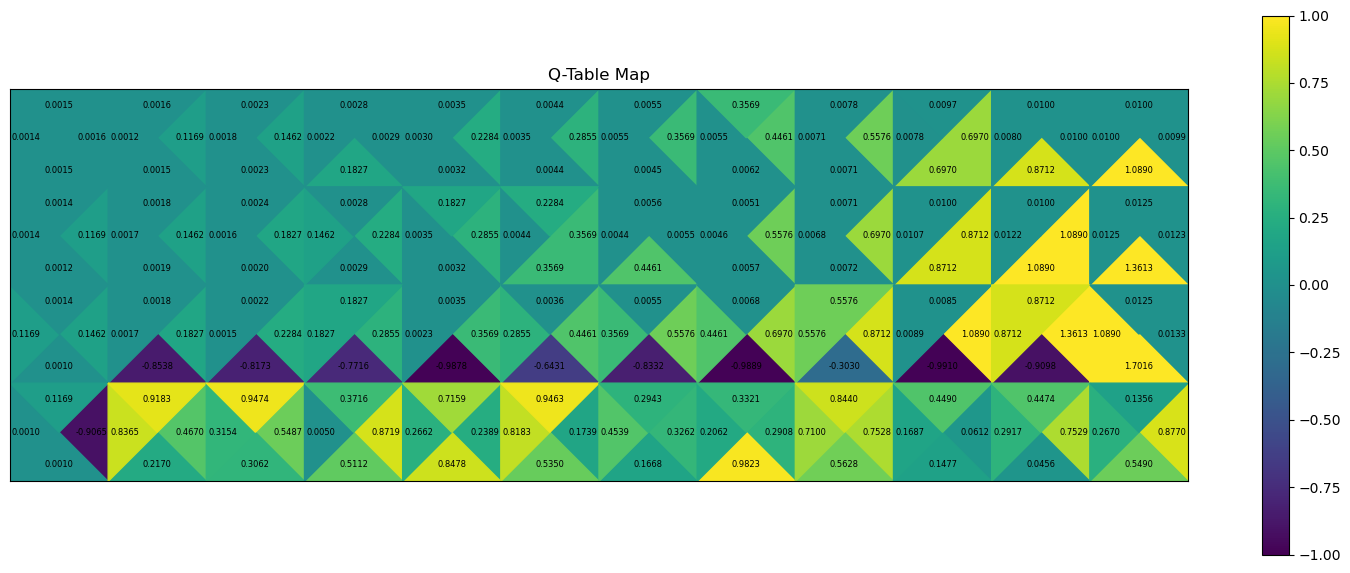

episodes # 56 / 70
Done in 13 steps



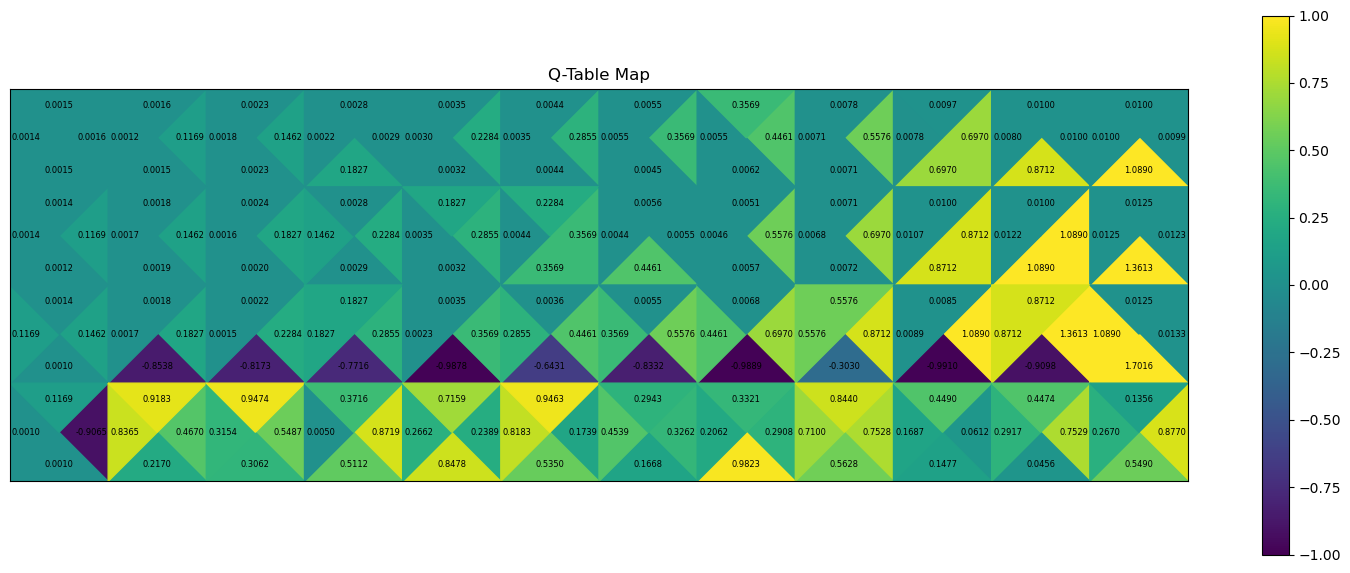

episodes # 57 / 70
Done in 14 steps



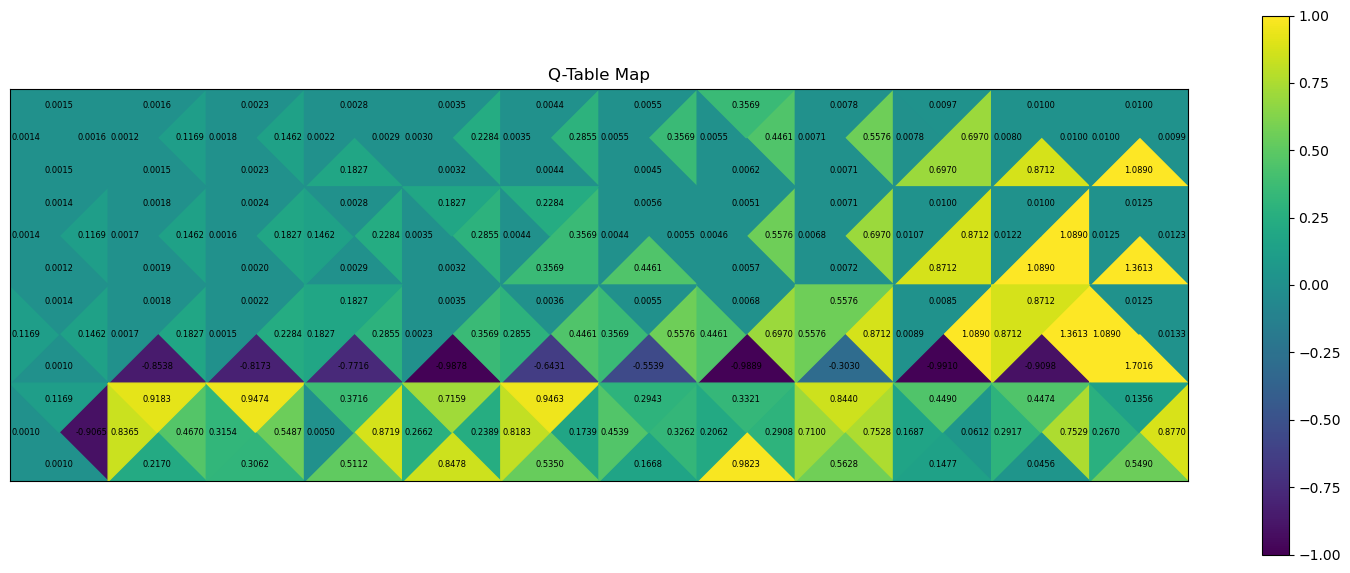

episodes # 58 / 70
Done in 13 steps



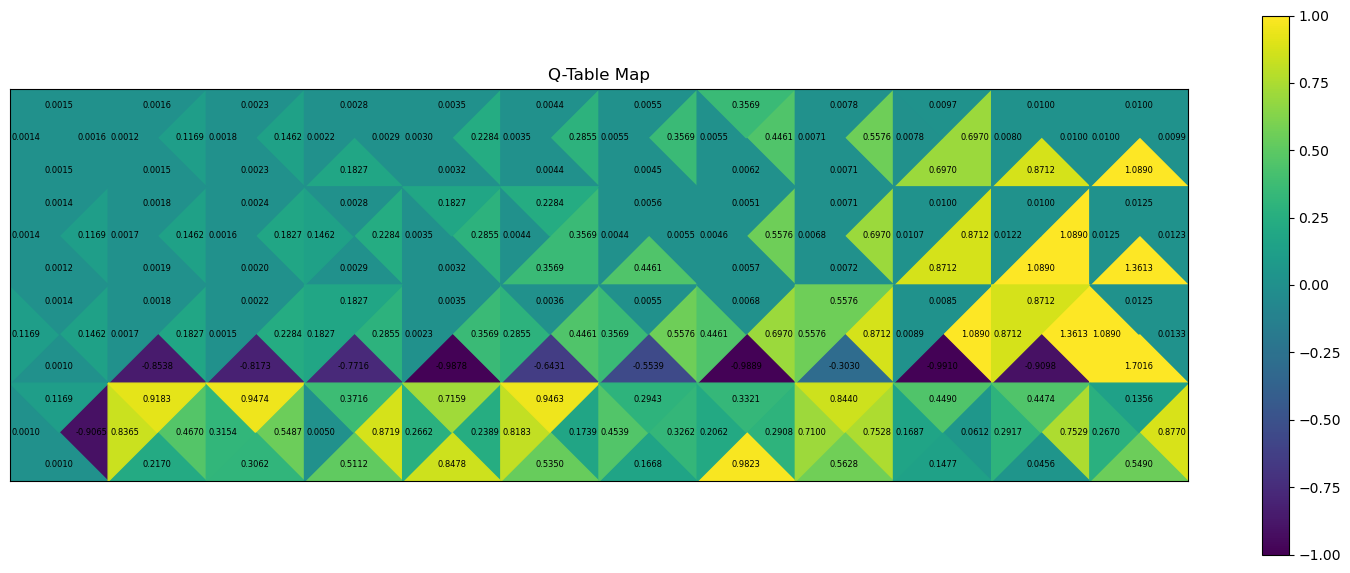

episodes # 59 / 70
Done in 19 steps



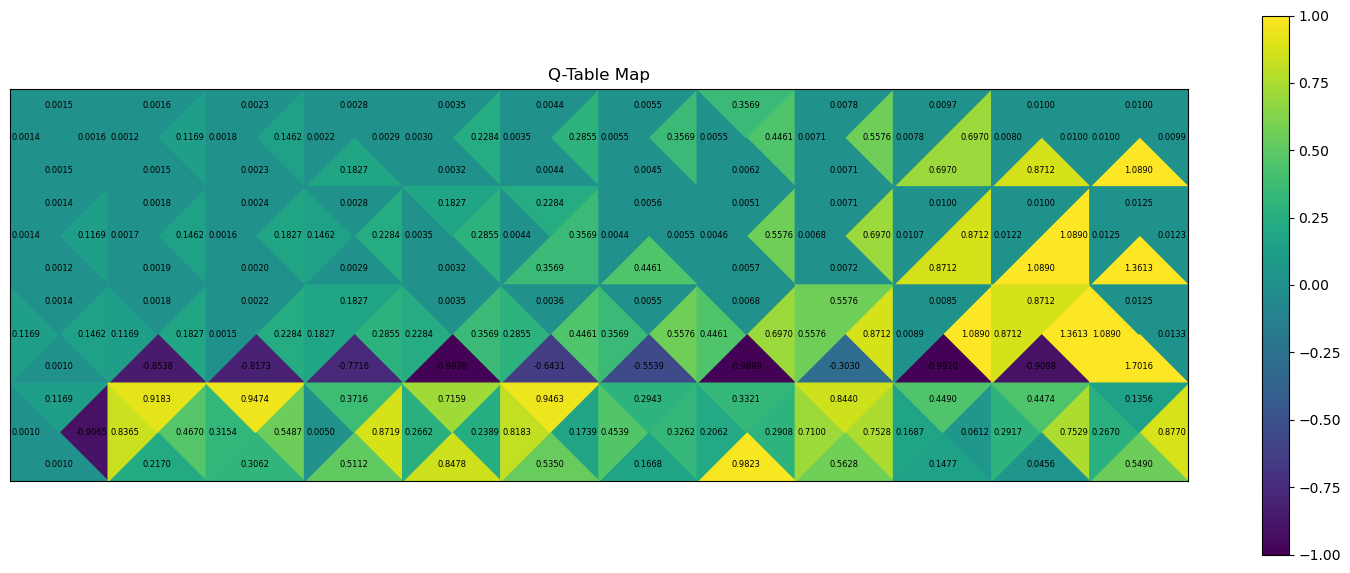

episodes # 60 / 70
Done in 15 steps



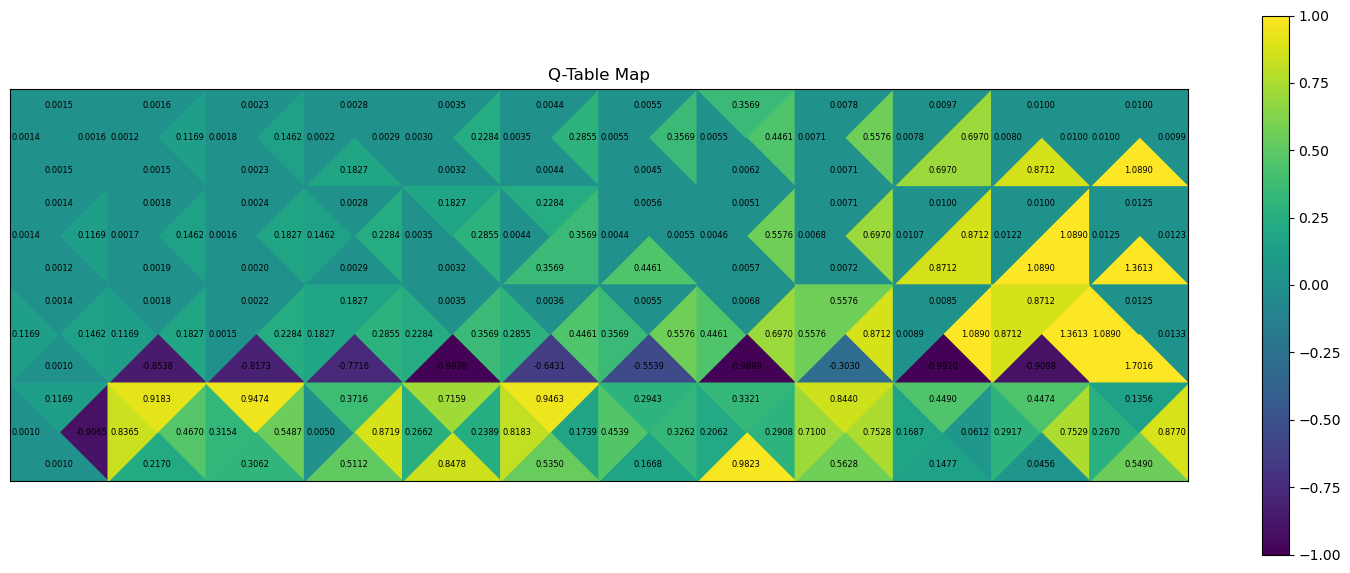

episodes # 61 / 70
Done in 15 steps



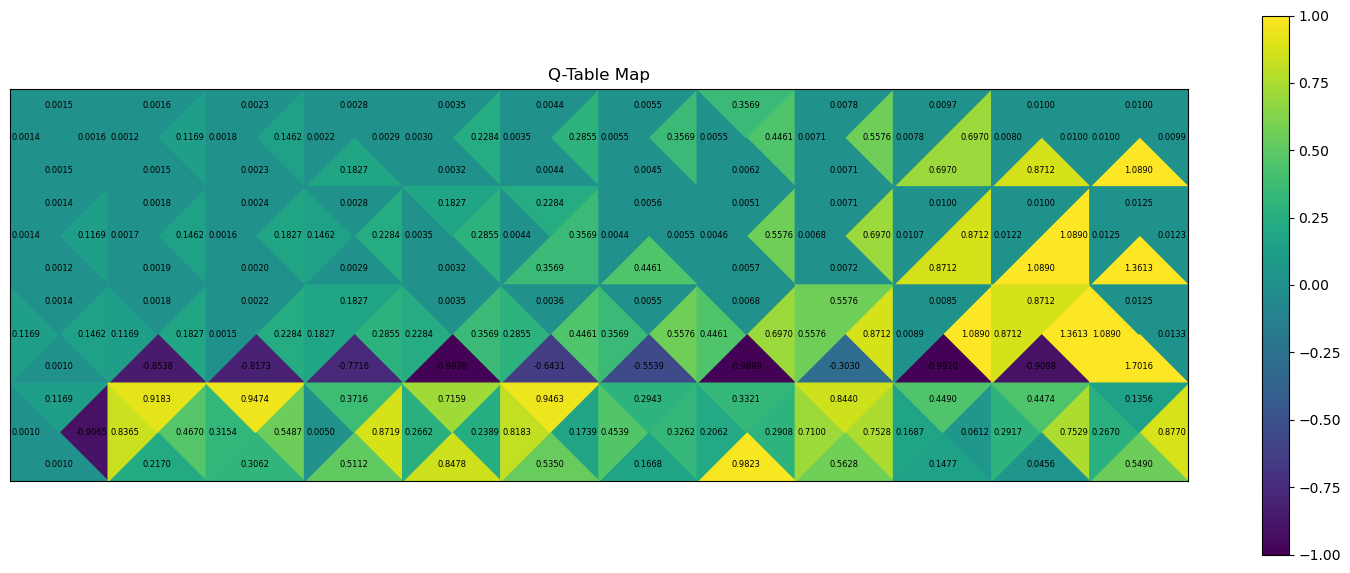

episodes # 62 / 70
Done in 14 steps



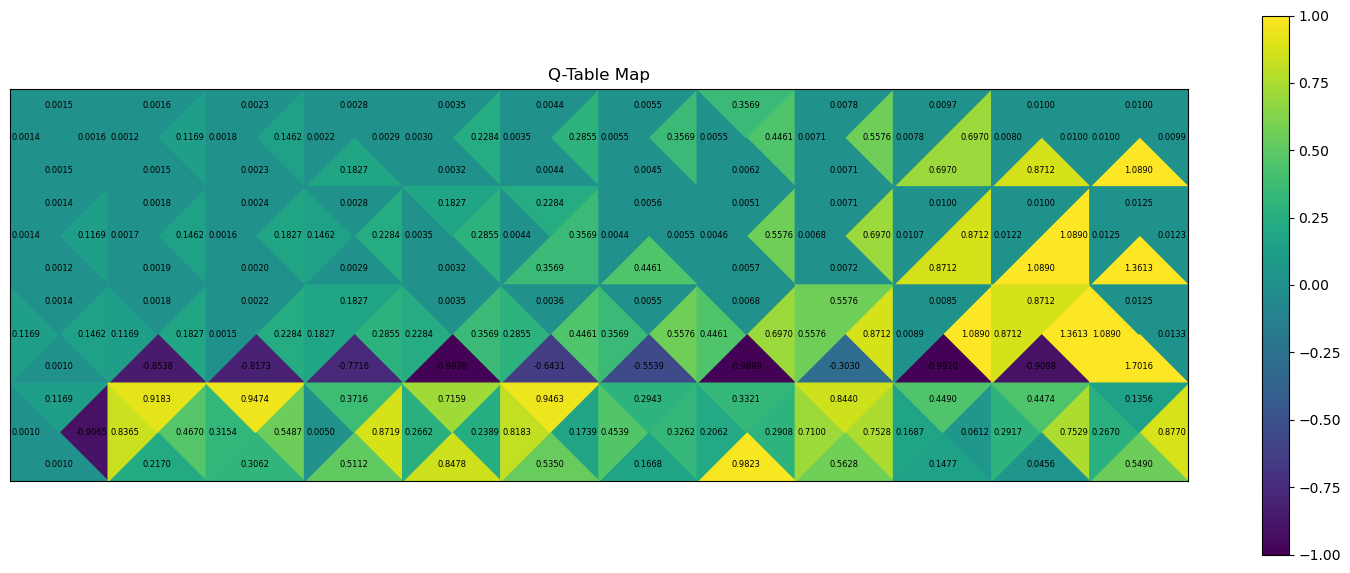

episodes # 63 / 70
Done in 13 steps



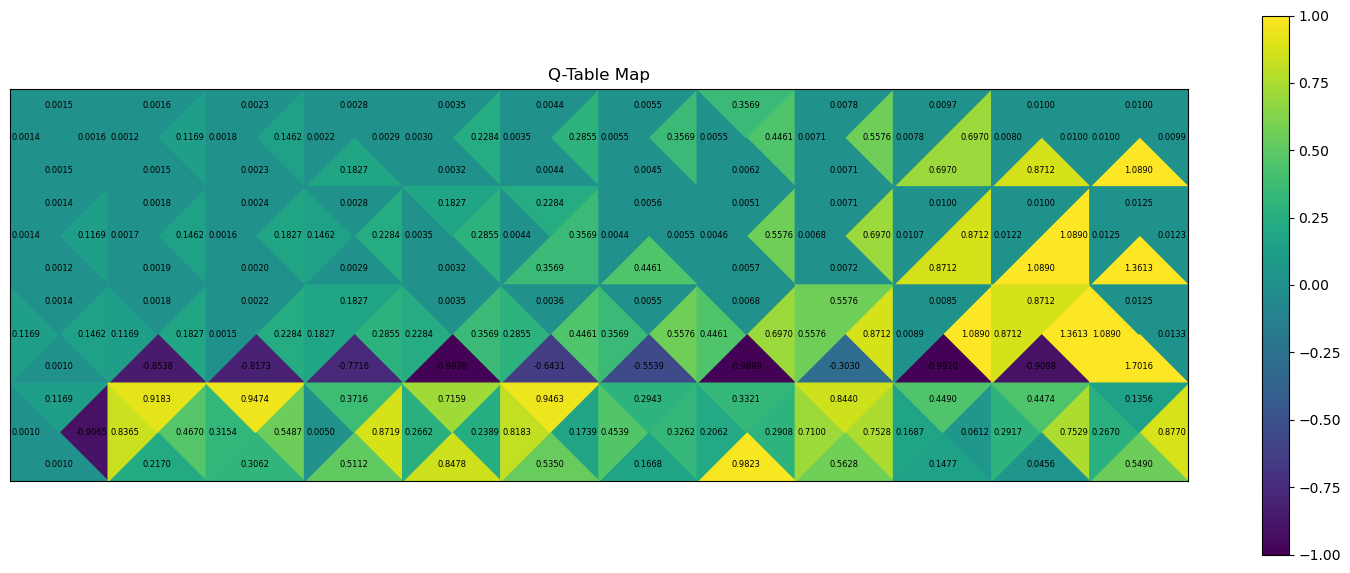

episodes # 64 / 70
Done in 13 steps



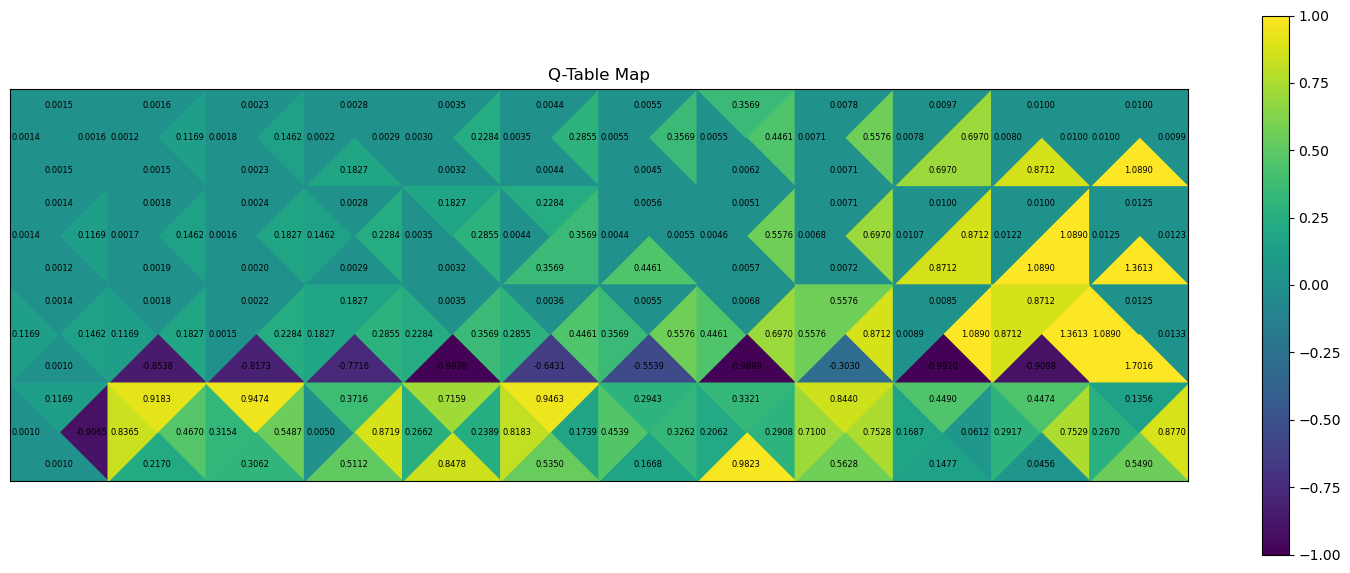

episodes # 65 / 70
Done in 13 steps



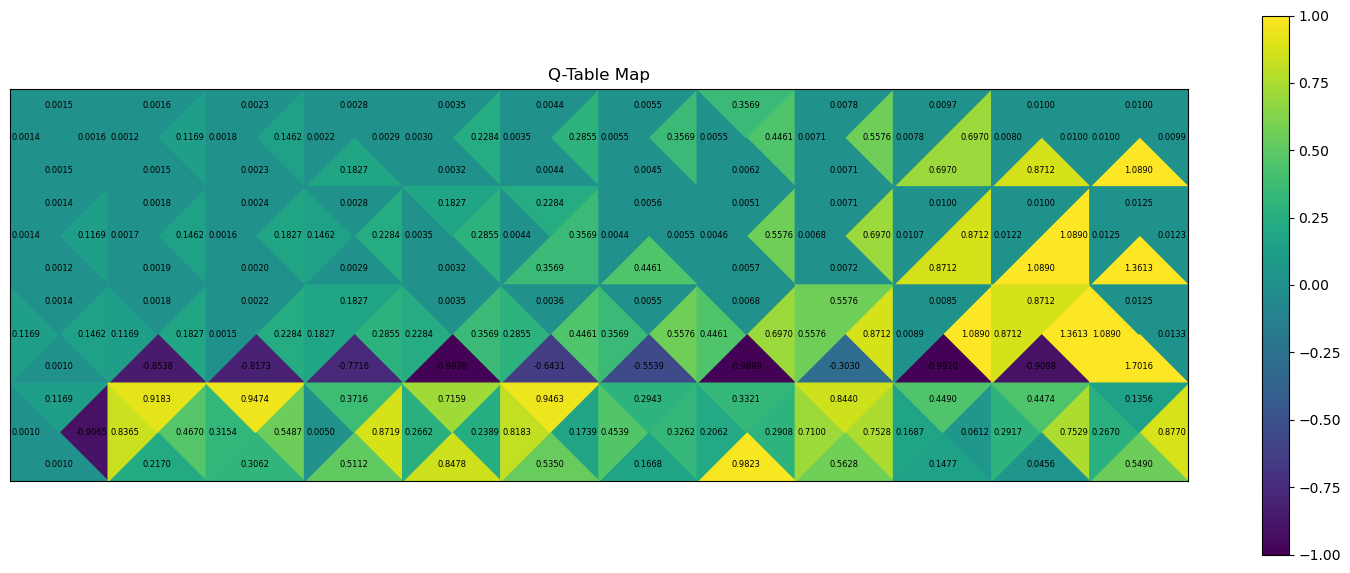

episodes # 66 / 70
Done in 15 steps



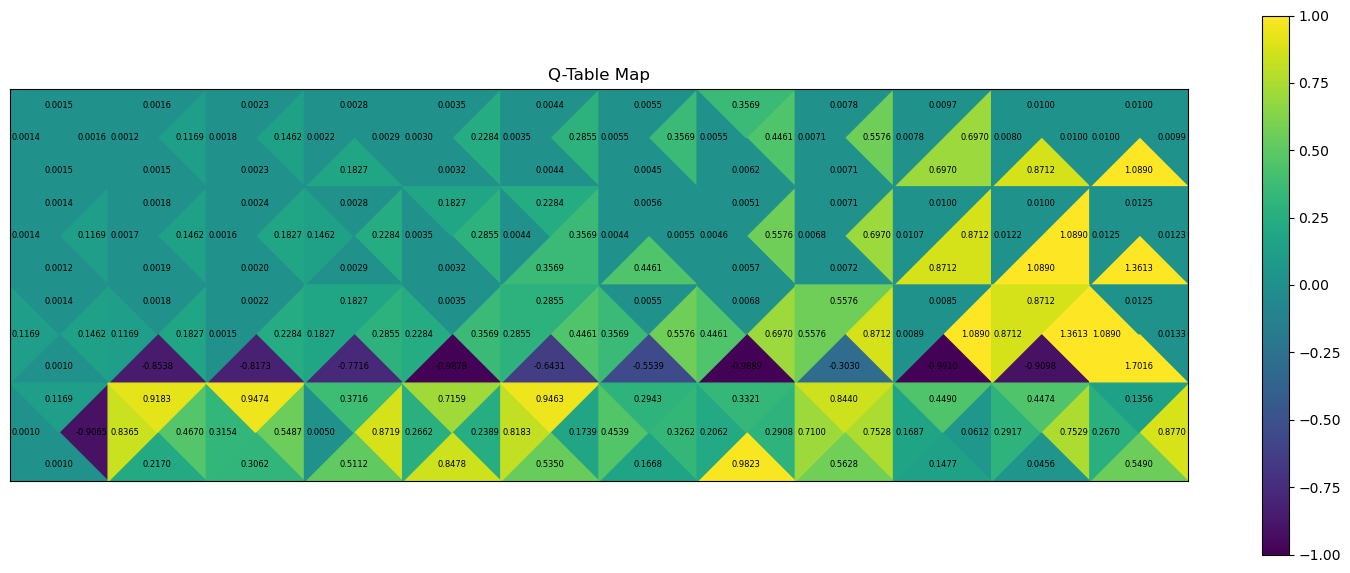

episodes # 67 / 70
Done in 15 steps



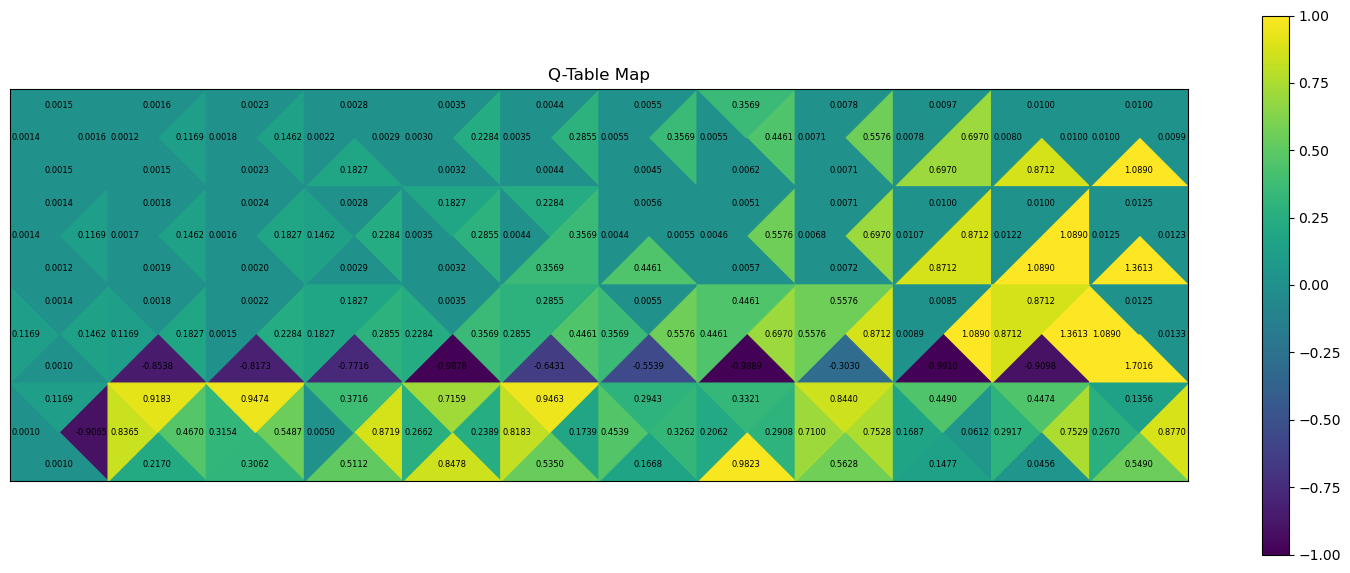

episodes # 68 / 70
Done in 13 steps



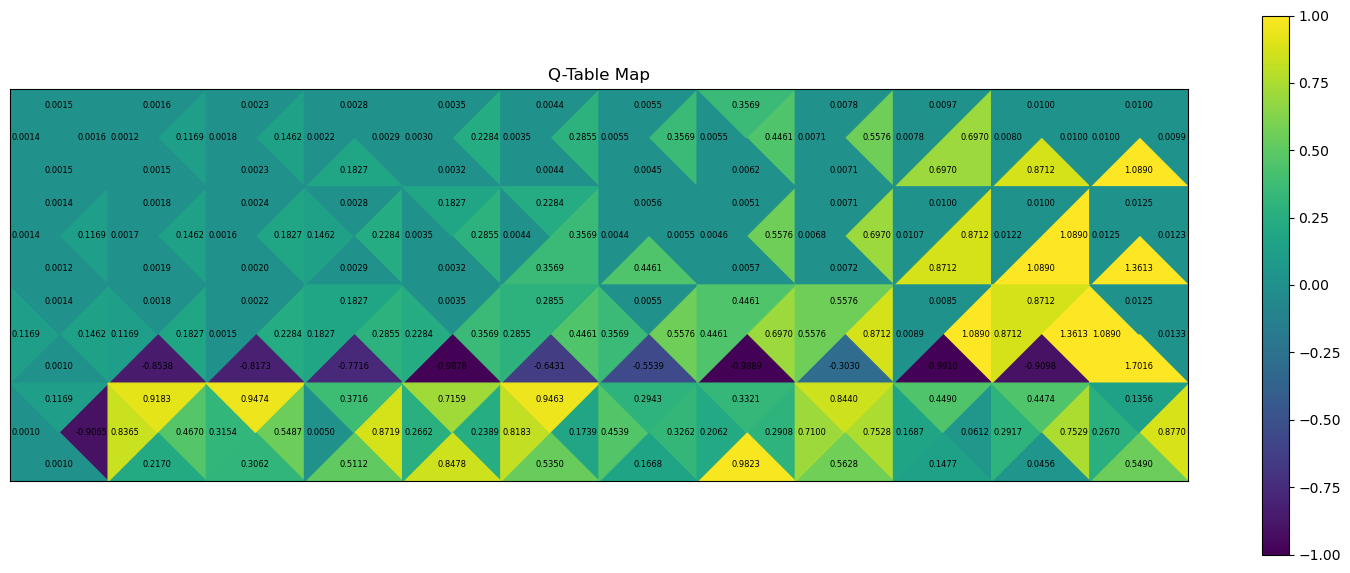

episodes # 69 / 70
Done in 13 steps



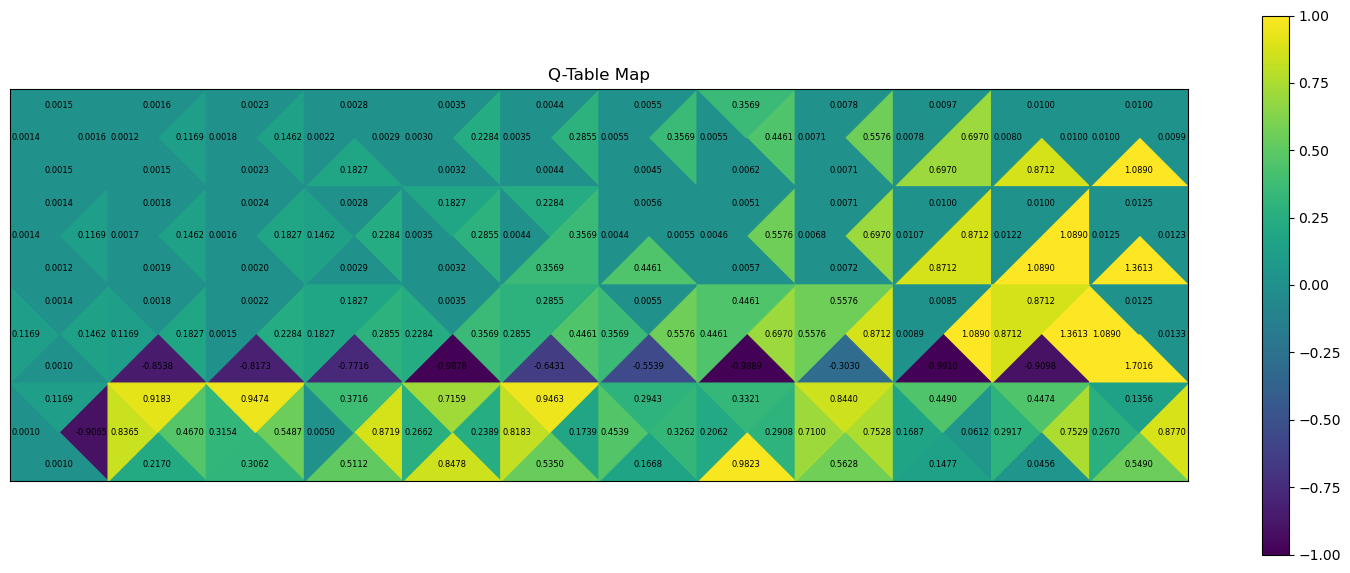

episodes # 70 / 70
Done in 13 steps



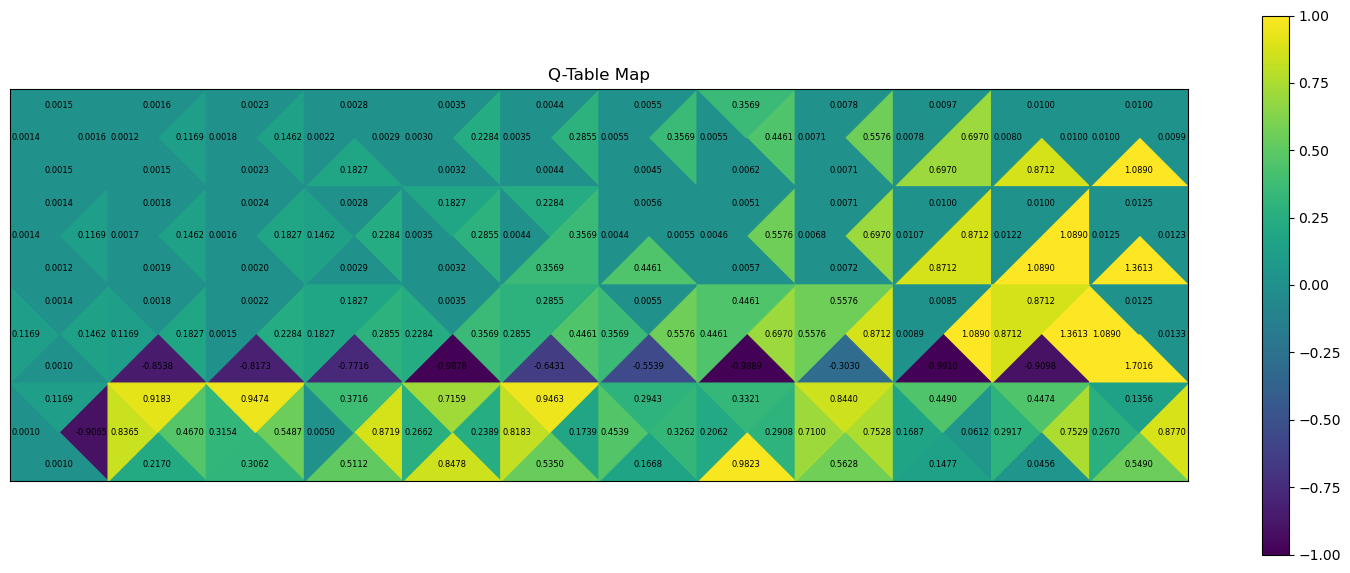

In [20]:
# plt.ion()
# plt.ioff()

# training loop
for i in range(episodes):
    print("episodes #", i + 1, "/", episodes)
    terminated = False
    truncated = False
    steps = 0
    state = 12 * observation["agent"][1] + observation["agent"][0]
    # print(state)

    while not terminated or truncated:
        # act randomly sometimes to allow exploration
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        # if not select max action in Qtable (act greedy)
        else:
            action = qtable[state].index(max(qtable[state]))

        observation, reward, terminated, truncated, info = env.step(action)

        next_state = 12 * observation["agent"][1] + observation["agent"][0]
        steps += 1
        # print("action:", action, "reward:", reward)
        qtable[state][action] = reward + gamma * max(qtable[next_state])
        state = next_state

    observation, info = env.reset()

    epsilon -= decay * epsilon
    print("Done in", steps, "steps\n".format(steps))

    # Plot the Q-Table
    fig, ax = plt.subplots(figsize=(19, 7))
    norm = Normalize(vmin=-1, vmax=1)
    cmap = plt.get_cmap("viridis")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    for i in range(numstates):
        x = i % 12
        y = i // 12
        for j in range(numactions):
            if j == 0:  # right
                points = [(x + 0.5, -y - 0.5), (x + 1, -y - 1), (x + 1, -y)]
            elif j == 1:  # top
                points = [(x + 0.5, -y - 0.5), (x + 1, -y - 1), (x, -y - 1)]
            elif j == 2:  # left
                points = [(x + 0.5, -y - 0.5), (x, -y - 1), (x, -y)]
            elif j == 3:  # down
                points = [(x + 0.5, -y - 0.5), (x, -y), (x + 1, -y)]
            rect = patches.Polygon(
                (points), closed=True, color=cmap(norm(qtable[i][j]))
            )
            ax.add_patch(rect)
            center_of_points = np.mean(points, axis=0)
            ax.text(
                center_of_points[0],
                center_of_points[1],
                f"{qtable[i][j]:.4f}",
                ha="center",
                va="center",
                color="black",
                fontsize=6,
            )

    ax.set_title("Q-Table Map")
    ax.set_xlim([0, 12])
    ax.set_ylim([-(numstates // 12), 0])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    fig.savefig(f"./plots/step{i}.png")
    plt.colorbar(sm)
    plt.show()
    # plt.pause(0.001)
    plt.close(fig)